In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel("2024_cohorts_merged_edited_copy.xlsx", sheet_name="2019_2022_merged", header=5)

In [3]:
df = data.copy()

In [253]:
season_1_crops = [
    'sn_1_beans_loss', 'sn_1_gnuts_loss', 'sn_1_soya_beans_loss', 'sn_1_maize_loss', 'sn_1_sorghum_loss', 'sn_1_irish_potatoes_loss',
    'sn_1_irish_potatoes_loss', 'sn_1_sweetpotatoes_loss', 'sn_1_cassava_loss'
]

In [255]:
season_2_crops = [
    'sn_2_beans_loss', 'sn_2_gnuts_loss', 'sn_2_soya_beans_loss', 'sn_2_maize_loss', 'sn_2_sorghum_loss', 
    'sn_2_irish_potatoes_loss', 'sn_2_sweetpotatoes_loss', 'sn_2_cassava_loss'
]

In [280]:
df['general_crop_loss_season_1'] = df[season_1_crops].max(axis=1)
df[season_2_crops] = df[season_2_crops].clip(upper=1)
df['general_crop_loss_season_2'] = df[season_2_crops].max(axis=1)

df['general_crop_loss'] = df[['general_crop_loss_season_1', 'general_crop_loss_season_2']].max(axis=1)

In [259]:
df['general_crop_loss']

0        NaN
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14009    0.0
14010    0.0
14011    1.0
14012    0.0
14013    1.0
Name: general_crop_loss, Length: 14014, dtype: float64

In [ ]:
# Step 4: Calculate the proportion of households with any crop loss in either season
general_loss_proportion = df['general_crop_loss'].mean()

# Print the general crop loss proportion
print(f"Proportion of households with any crop loss across both seasons: {general_loss_proportion:.2f}")

0        NaN
1        1.0
2        1.0
3        0.0
4        1.0
        ... 
14009    0.0
14010    0.0
14011    1.0
14012    0.0
14013    1.0
Length: 14014, dtype: float64

In [281]:
df['3_Composts'] = df['composts']                   # 3 Composts
df['Compost_size'] = df['compost_dimension']        # Compost size
df['Correct_Use_of_Compost'] = df['composts_freq_use']  # Correct Use of Compost
df['Organic_manure'] = df['hh_produce_organics']    # Organic manure
df['Liquid_manure'] = df['apply_liquid_manure']     # Liquid manure
df['Water_control_practice'] = df['water_control_practise']  # Water control practice
df['Soil_management'] = df['soil_management']       # Soil management           
df['Post_harvest_management'] = df['postharvest_food_storage']  # Post harvest management

In [130]:
def calculate_compost_compliance(row):
    base_score = 100
    total_score = base_score
    
    # Weights for each criterion (adjust as needed)
    weights = {
        'composts_num': 20,
        'composts_standard': 20,
        'forms_non_bio': 15,
        'composts_free_runoff': 15,
        'composts_freq_use': 20,
        'composts_near': 10
    }
    
    # Check number of compost pits
    if row['composts_num'] == 0:
        total_score -= weights['composts_num']
    
    # Check criteria where 1 (Yes) is good
    for criterion in ['composts_standard', 'composts_free_runoff', 'composts_freq_use', 'composts_near']:
        if row[criterion] == 0:  # 0 means No, so deduct points
            total_score -= weights[criterion]
    
    # For forms_non_bio, 1 (Yes) is bad, so we deduct points if it's 1
    if row['forms_non_bio'] == 1:
        total_score -= weights['forms_non_bio']
    
    # Calculate percentage
    compliance_percentage = (total_score / base_score) * 100
    
    return round(compliance_percentage, 2)

In [131]:
# Assuming your DataFrame is named 'df'
df['compost_compliance'] = df.apply(calculate_compost_compliance, axis=1)

In [134]:
# Now you can see the compliance score for each row
df[['composts_num', 'composts_standard', 'forms_non_bio', 'composts_free_runoff', 
          'composts_freq_use', 'composts_near', 'compost_compliance']]

,composts_num,composts_standard,forms_non_bio,composts_free_runoff,composts_freq_use,composts_near,compost_compliance
0,NaN,NaN,NaN,NaN,NaN,NaN,100.0
1,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,NaN,NaN,NaN,NaN,NaN,NaN,100.0
3,NaN,NaN,NaN,NaN,NaN,NaN,100.0
4,NaN,NaN,NaN,NaN,NaN,NaN,100.0
...,...,...,...,...,...,...,...
14009,NaN,NaN,NaN,NaN,NaN,NaN,100.0
14010,3.0,1.0,0.0,1.0,1.0,1.0,100.0
14011,3.0,1.0,1.0,1.0,1.0,1.0,85.0
14012,3.0,1.0,0.0,1.0,1.0,0.0,90.0


In [ ]:
# You can also get summary statistics
print(df['compost_compliance'].describe())

       composts_num  composts_standard  forms_non_bio  composts_free_runoff  \
0               NaN                NaN            NaN                   NaN   
1               NaN                NaN            NaN                   NaN   
2               NaN                NaN            NaN                   NaN   
3               NaN                NaN            NaN                   NaN   
4               NaN                NaN            NaN                   NaN   
...             ...                ...            ...                   ...   
14009           NaN                NaN            NaN                   NaN   
14010           3.0                1.0            0.0                   1.0   
14011           3.0                1.0            1.0                   1.0   
14012           3.0                1.0            0.0                   1.0   
14013           3.0                1.0            1.0                   1.0   

       composts_freq_use  composts_near  compost_co

In [301]:
variables = [
    '3_Composts',
    # 'Compost_size',
    # 'Correct_Use_of_Compost',
    'Organic_manure',
    'Liquid_manure',
    'Water_control_practice',
    'Soil_management',
    'Post_harvest_management'
]

In [6]:
# df['pre_district'] = df['pre_district'].replace({"kanungu":"Kanungu"})

# df["3 composts"] = df["composts_num"].apply(lambda x: 1 if x>=3 else 0)

# df['compost size'] = df['composts_standard'].apply(lambda x: 1 if x>0 else 0)

# df['correct use of compost'] = df['composts_standard'].apply(lambda x: 1 if x>0 else 0)

# df['Organic manure'] = df['composts_standard'].apply(lambda x: 1 if x>0 else 0)

# df['Water control practices'] = df['composts_standard'].apply(lambda x: 1 if x>0 else 0)

# df['Soil management'] = df['composts_standard'].apply(lambda x: 1 if x>0 else 0)

# df['Post harvest management'] = df['composts_standard'].apply(lambda x: 1 if x>0 else 0)

In [282]:
year_2 = df[df['pre_cohort'] == 2022]
year_5 = df[df['pre_cohort'] == 2019]

In [291]:
variables

['3_Composts',
 'Organic_manure',
 'Liquid_manure',
 'Water_control_practice',
 'Soil_management',
 'Post_harvest_management']

In [284]:
normalized_results = {}

for var in variables:
    normalized_results[var] = year_2.groupby('STATUS')[var].value_counts(normalize=True)

# Convert the dictionary to a DataFrame for better visualization
normalized_df = pd.DataFrame(normalized_results)

In [323]:
year_2.groupby('STATUS')["AGRIC (%)"].mean()

STATUS
PEER    0.321667
RTV     0.765042
Name: AGRIC (%), dtype: float64

In [285]:
normalized_df.transpose()

STATUS                       PEER                 RTV          
                                0         1         0         1
3_Composts               0.989937  0.010063  0.359260  0.640740
Organic_manure           0.989937  0.010063  0.382043  0.617957
Liquid_manure            0.991824  0.008176  0.374816  0.625184
Water_control_practice   0.597170  0.402830  0.328638  0.671362
Soil_management          0.241824  0.758176  0.072881  0.927119
Post_harvest_management  0.491509  0.508491  0.245590  0.754410

In [294]:
rtv_props = rtv[variables].apply(pd.Series.value_counts, normalize=True).transpose()[1]
peer_props = rtv[variables].apply(pd.Series.value_counts, normalize=True).transpose()[1]

# Total number of observations in each group (n_rtvs, n_peers)
n_rtvs = len(rtv)
n_peers = len(peer)

# Loop through each feature to perform the z-test
results = []
for feature in rtv_props.index:
    count = [rtv_props[feature] * n_rtvs, peer_props[feature] * n_peers]
    nobs = [n_rtvs, n_peers]
    
    zstat, pval = proportions_ztest(count, nobs)
    results.append((feature, zstat, pval))

# Convert results to a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(results, columns=['Feature', 'Z-Score', 'P-Value'])

print(results_df)

                   Feature       Z-Score  P-Value
0               3_Composts  0.000000e+00      1.0
1           Organic_manure  0.000000e+00      1.0
2            Liquid_manure  0.000000e+00      1.0
3   Water_control_practice -1.130720e-14      1.0
4          Soil_management  0.000000e+00      1.0
5  Post_harvest_management  0.000000e+00      1.0


In [300]:
results = []
for feature in variables:
    rtv_counts = rtv[feature].value_counts()
    peer_counts = peer[feature].value_counts()
    contingency_table = pd.DataFrame({'RTV': rtv_counts, 'Peer': peer_counts}).fillna(0)

    # Check if the contingency table has data before performing the test
    if contingency_table.sum().sum() > 0:
        chi2, p, _, _ = chi2_contingency(contingency_table)
        results.append((feature, chi2, p))
    else:
        results.append((feature, None, None))  # Handle cases with no data

results_df = pd.DataFrame(results, columns=['Feature', 'Chi-Squared', 'P-Value'])
print(results_df)

                   Feature  Chi-Squared        P-Value
0               3_Composts  3657.639665   0.000000e+00
1             Compost_size  4483.251955   0.000000e+00
2   Correct_Use_of_Compost   110.358575   8.177623e-26
3           Organic_manure  3418.007011   0.000000e+00
4            Liquid_manure  3514.642680   0.000000e+00
5   Water_control_practice   684.306783  7.733077e-151
6          Soil_management   615.896345  5.838375e-136
7  Post_harvest_management   640.807415  2.230175e-141
8                AGRIC (%)  5653.166356   0.000000e+00


In [262]:
rtv = year_2[year_2["STATUS"] == "RTV"]
peer = year_2[year_2["STATUS"] == "PEER"]

In [59]:
# Prepare the data
X = rtv['3_Composts']  # One-hot encode the yes/no variable
X = sm.add_constant(X)  # Add a constant term to the predictor
y = rtv['HH Income + Production (USD_Cons_rate)']

In [61]:
# Fit the OLS model
model = sm.OLS(y, X).fit()

# Extract coefficients and confidence intervals
coef = model.params
conf_int = model.conf_int()

In [100]:
df['Agriculture Value (USD_Cons_rate)']

0           0.000000
1          55.957333
2          66.845156
3          35.569778
4          60.945778
            ...     
14009    2769.562667
14010     189.777778
14011     810.622222
14012     517.561956
14013     817.454222
Name: Agriculture Value (USD_Cons_rate), Length: 14014, dtype: float64

In [330]:
# Independent variables
X = year_2[variables]

# Dependent variable
y = year_2['Agriculture Value (USD_Cons_rate)']

# Add constant to the model (for the intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary (optional)
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Agriculture Value (USD_Cons_rate)   R-squared:                       0.188
Model:                                           OLS   Adj. R-squared:                  0.188
Method:                                Least Squares   F-statistic:                     438.4
Date:                               Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                                       17:46:57   Log-Likelihood:                -80780.
No. Observations:                              11344   AIC:                         1.616e+05
Df Residuals:                                  11337   BIC:                         1.616e+05
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
                              coef    std err          t    

In [326]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'rtv' is your DataFrame and 'variables' is a list of independent variable names

# Independent variables
X = year_2[variables]

# Dependent variable
y = year_2['Agriculture Value (USD_Cons_rate)']

# Standardize the dependent variable
y_standardized = (y - y.mean()) / y.std()

# Add constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the model with the standardized dependent variable
model = sm.OLS(y_standardized, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Agriculture Value (USD_Cons_rate)   R-squared:                       0.188
Model:                                           OLS   Adj. R-squared:                  0.188
Method:                                Least Squares   F-statistic:                     438.4
Date:                               Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                                       16:57:13   Log-Likelihood:                -14913.
No. Observations:                              11344   AIC:                         2.984e+04
Df Residuals:                                  11337   BIC:                         2.989e+04
Df Model:                                          6                                         
Covariance Type:                           nonrobust                                         
                              coef    std err          t    

In [318]:
print(results.params)

const                     -0.669213
3_Composts                 0.383887
Organic_manure             0.222445
Liquid_manure              0.305755
Water_control_practice     0.106040
Soil_management            0.154508
Post_harvest_management    0.078992
dtype: float64


In [319]:
print(results.conf_int())

                                0         1
const                   -0.719973 -0.618453
3_Composts               0.344647  0.423127
Organic_manure           0.166412  0.278478
Liquid_manure            0.250281  0.361229
Water_control_practice   0.068395  0.143686
Soil_management          0.099250  0.209766
Post_harvest_management  0.040338  0.117646


In [17]:
# # Get the coefficients and confidence intervals
# coefficients = results.params
# conf = results.conf_int()
# conf['coef'] = coefficients

# # Prepare data for plotting
# conf.columns = ['CI_lower', 'CI_upper', 'coef']

# # Plotting the coefficients with confidence intervals
# fig, ax = plt.subplots(figsize=(10, 6))

# # Variable names (excluding the intercept)
# # variables = variables

# # Plot coefficients and error bars (CI)
# ax.errorbar(conf['coef'][1:], np.arange(len(variables)), 
#             xerr=[conf['coef'][1:] - conf['CI_lower'][1:], conf['CI_upper'][1:] - conf['coef'][1:]],
#             fmt='o', color='black', capsize=5)

# # Add a vertical line at 0 (the null effect)
# ax.axvline(x=0, color='red', linestyle='--')

# # Set labels
# ax.set_yticks(np.arange(len(variables)))
# ax.set_yticklabels(variables)
# ax.set_xlabel('Coefficient Estimate')
# ax.set_title('Forest Plot of Regression Coefficients')

# # Show plot
# plt.tight_layout()
# plt.show()

In [15]:
# import matplotlib.font_manager as fm

# # List all available fonts
# fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# for font in sorted(fonts):
#     print(font)


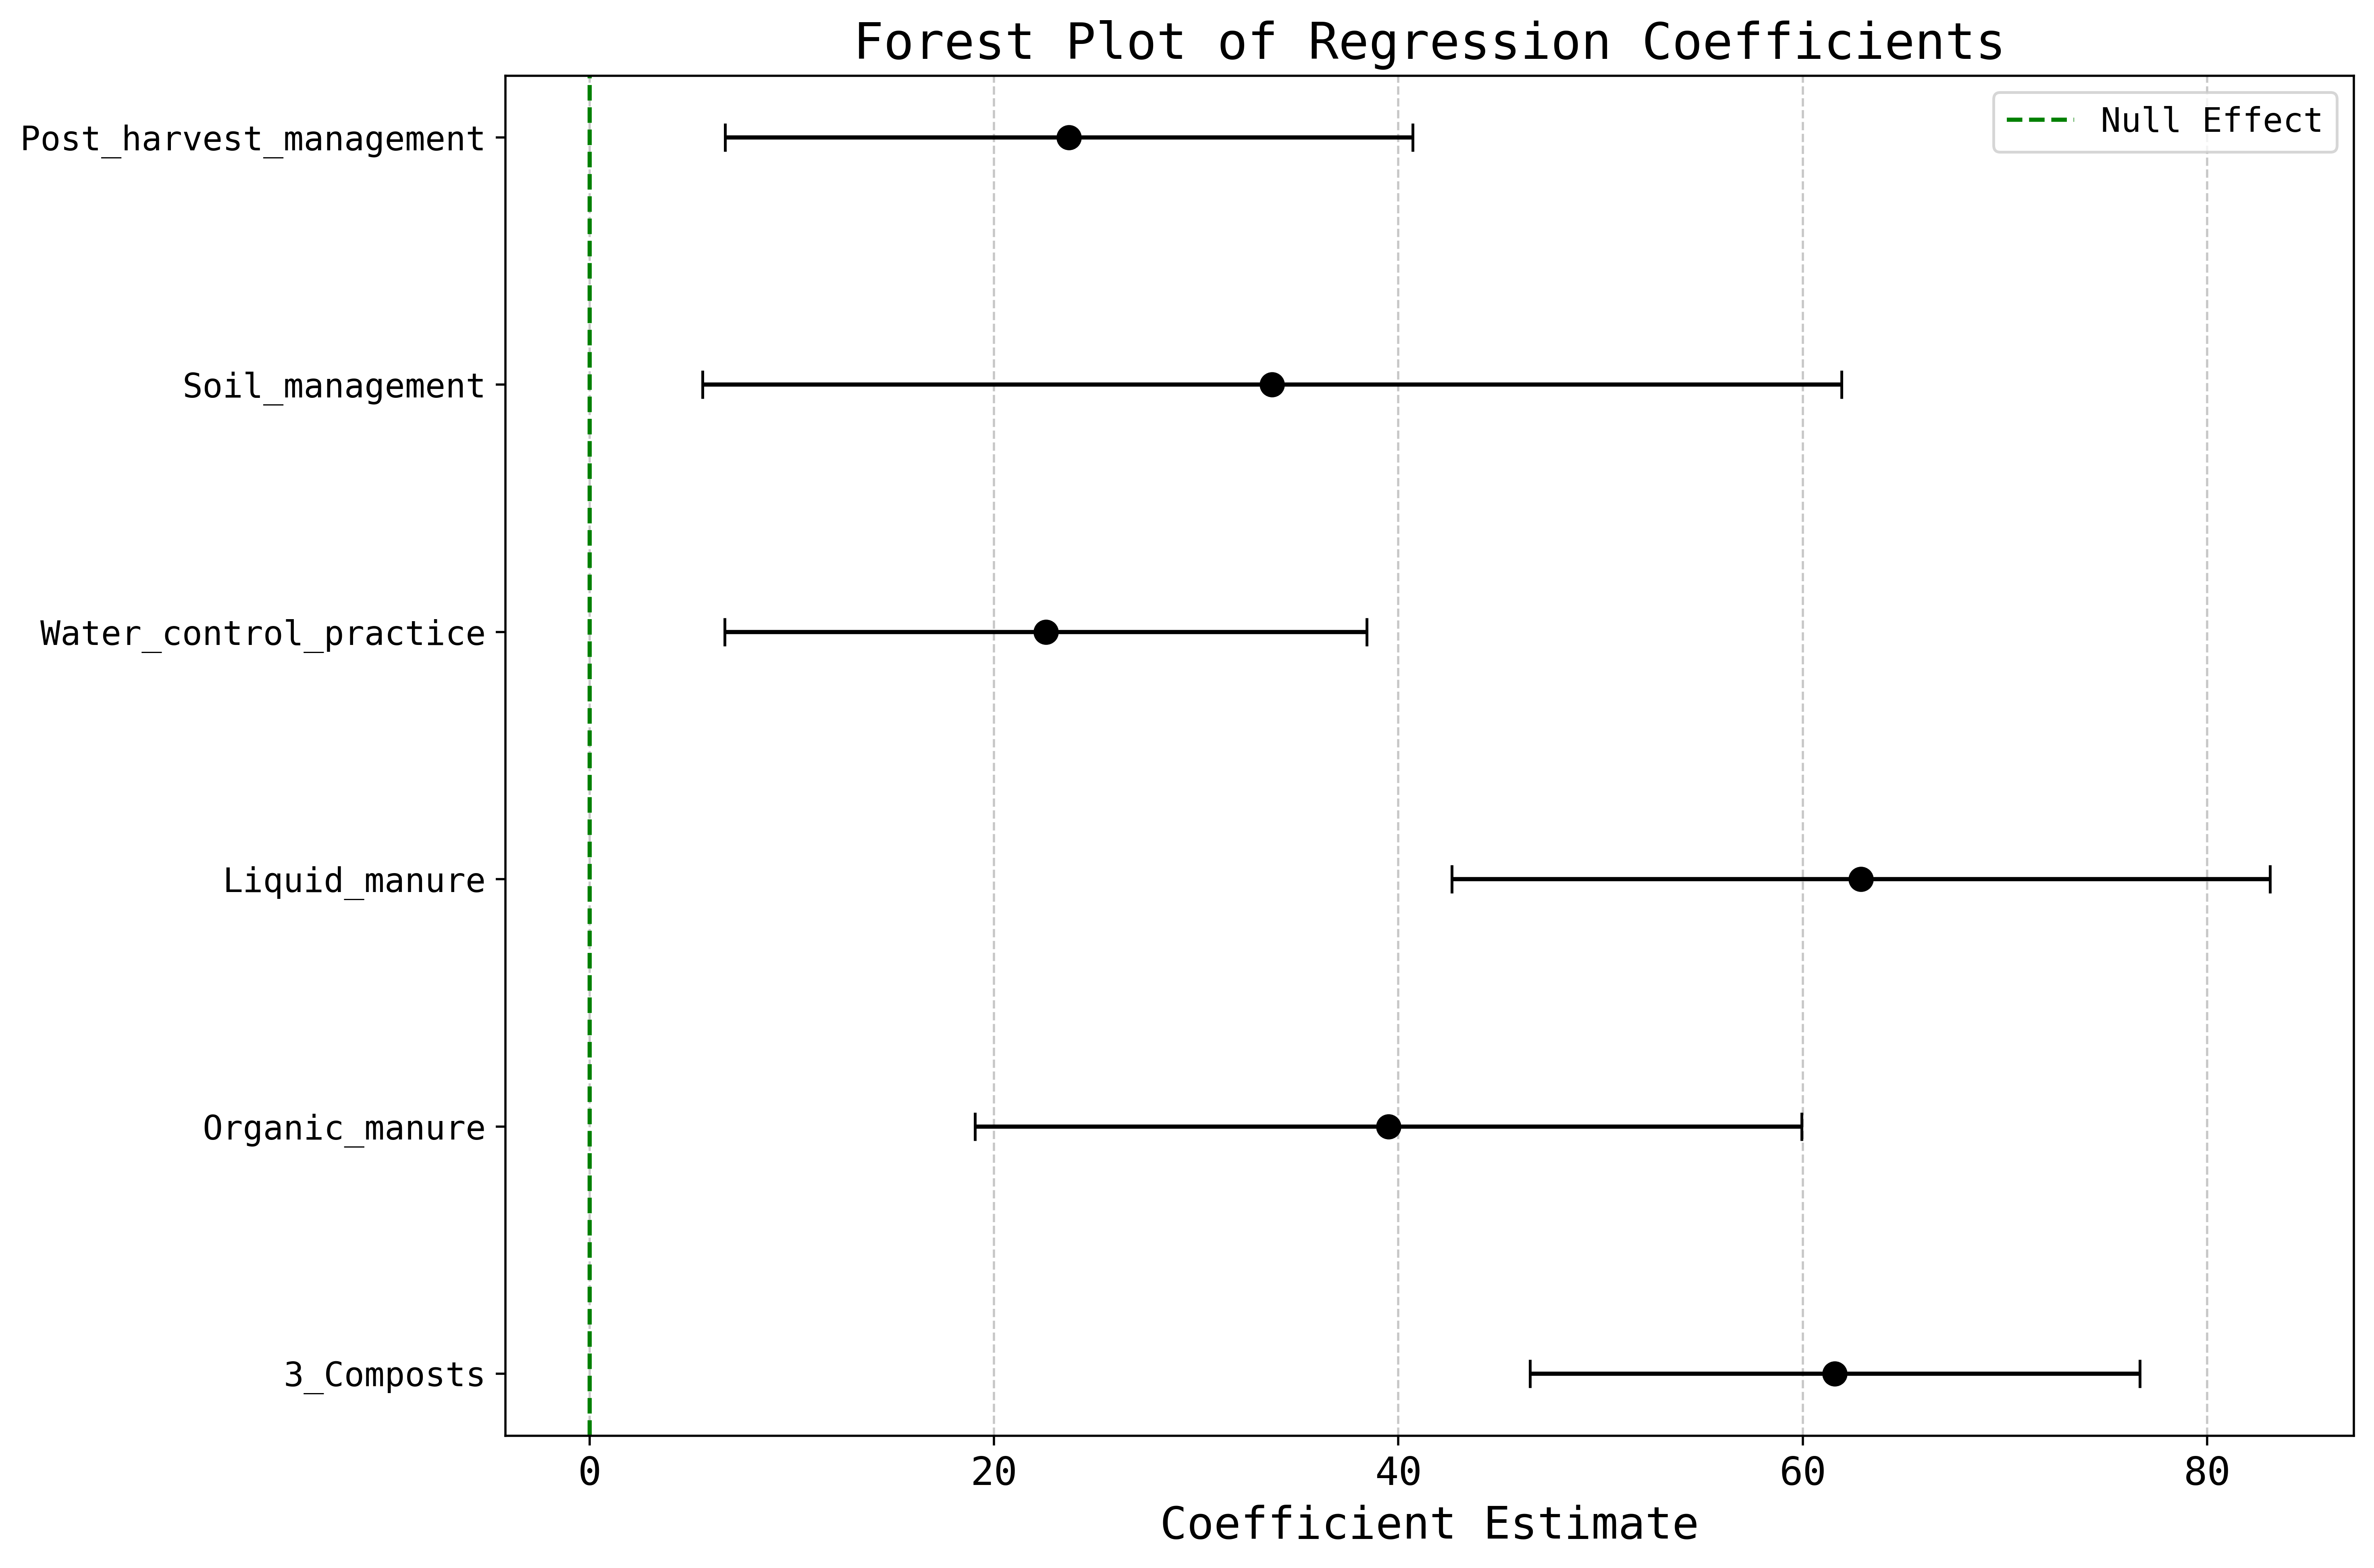

In [106]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

# Set font to Oswald
rcParams['font.family'] = 'monospace'
rcParams['font.size'] = 14  # Increase default font size

# Extract coefficients and confidence intervals
coefficients = results.params
conf_intervals = results.conf_int()
conf_intervals['coef'] = coefficients

# Rename columns for clarity
conf_intervals.columns = ['CI_lower', 'CI_upper', 'coef']

# Prepare the plot with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=500)  # Increase figure size and DPI

# Calculate error bars for the confidence intervals
lower_errors = conf_intervals['coef'][1:] - conf_intervals['CI_lower'][1:]
upper_errors = conf_intervals['CI_upper'][1:] - conf_intervals['coef'][1:]

# Plot coefficients with error bars
ax.errorbar(conf_intervals['coef'][1:], 
            np.arange(len(variables)), 
            xerr=[lower_errors, upper_errors], 
            fmt='o', color='black', capsize=5, markersize=8)

# Add a reference line at x=0 (null effect)
ax.axvline(x=0, color='green', linestyle='--', label='Null Effect')

# Set y-ticks and labels
ax.set_yticks(np.arange(len(variables)))
ax.set_yticklabels(variables, fontsize=12)  # Increase font size for y-tick labels
ax.set_xlabel('Coefficient Estimate', fontsize=16)  # Increase font size for x-label
ax.set_title('Forest Plot of Regression Coefficients', fontsize=18)  # Increase font size for title
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
ax.legend(fontsize=12)  # Increase font size for legend

# Optimize layout and display the plot
plt.tight_layout()
plt.show()


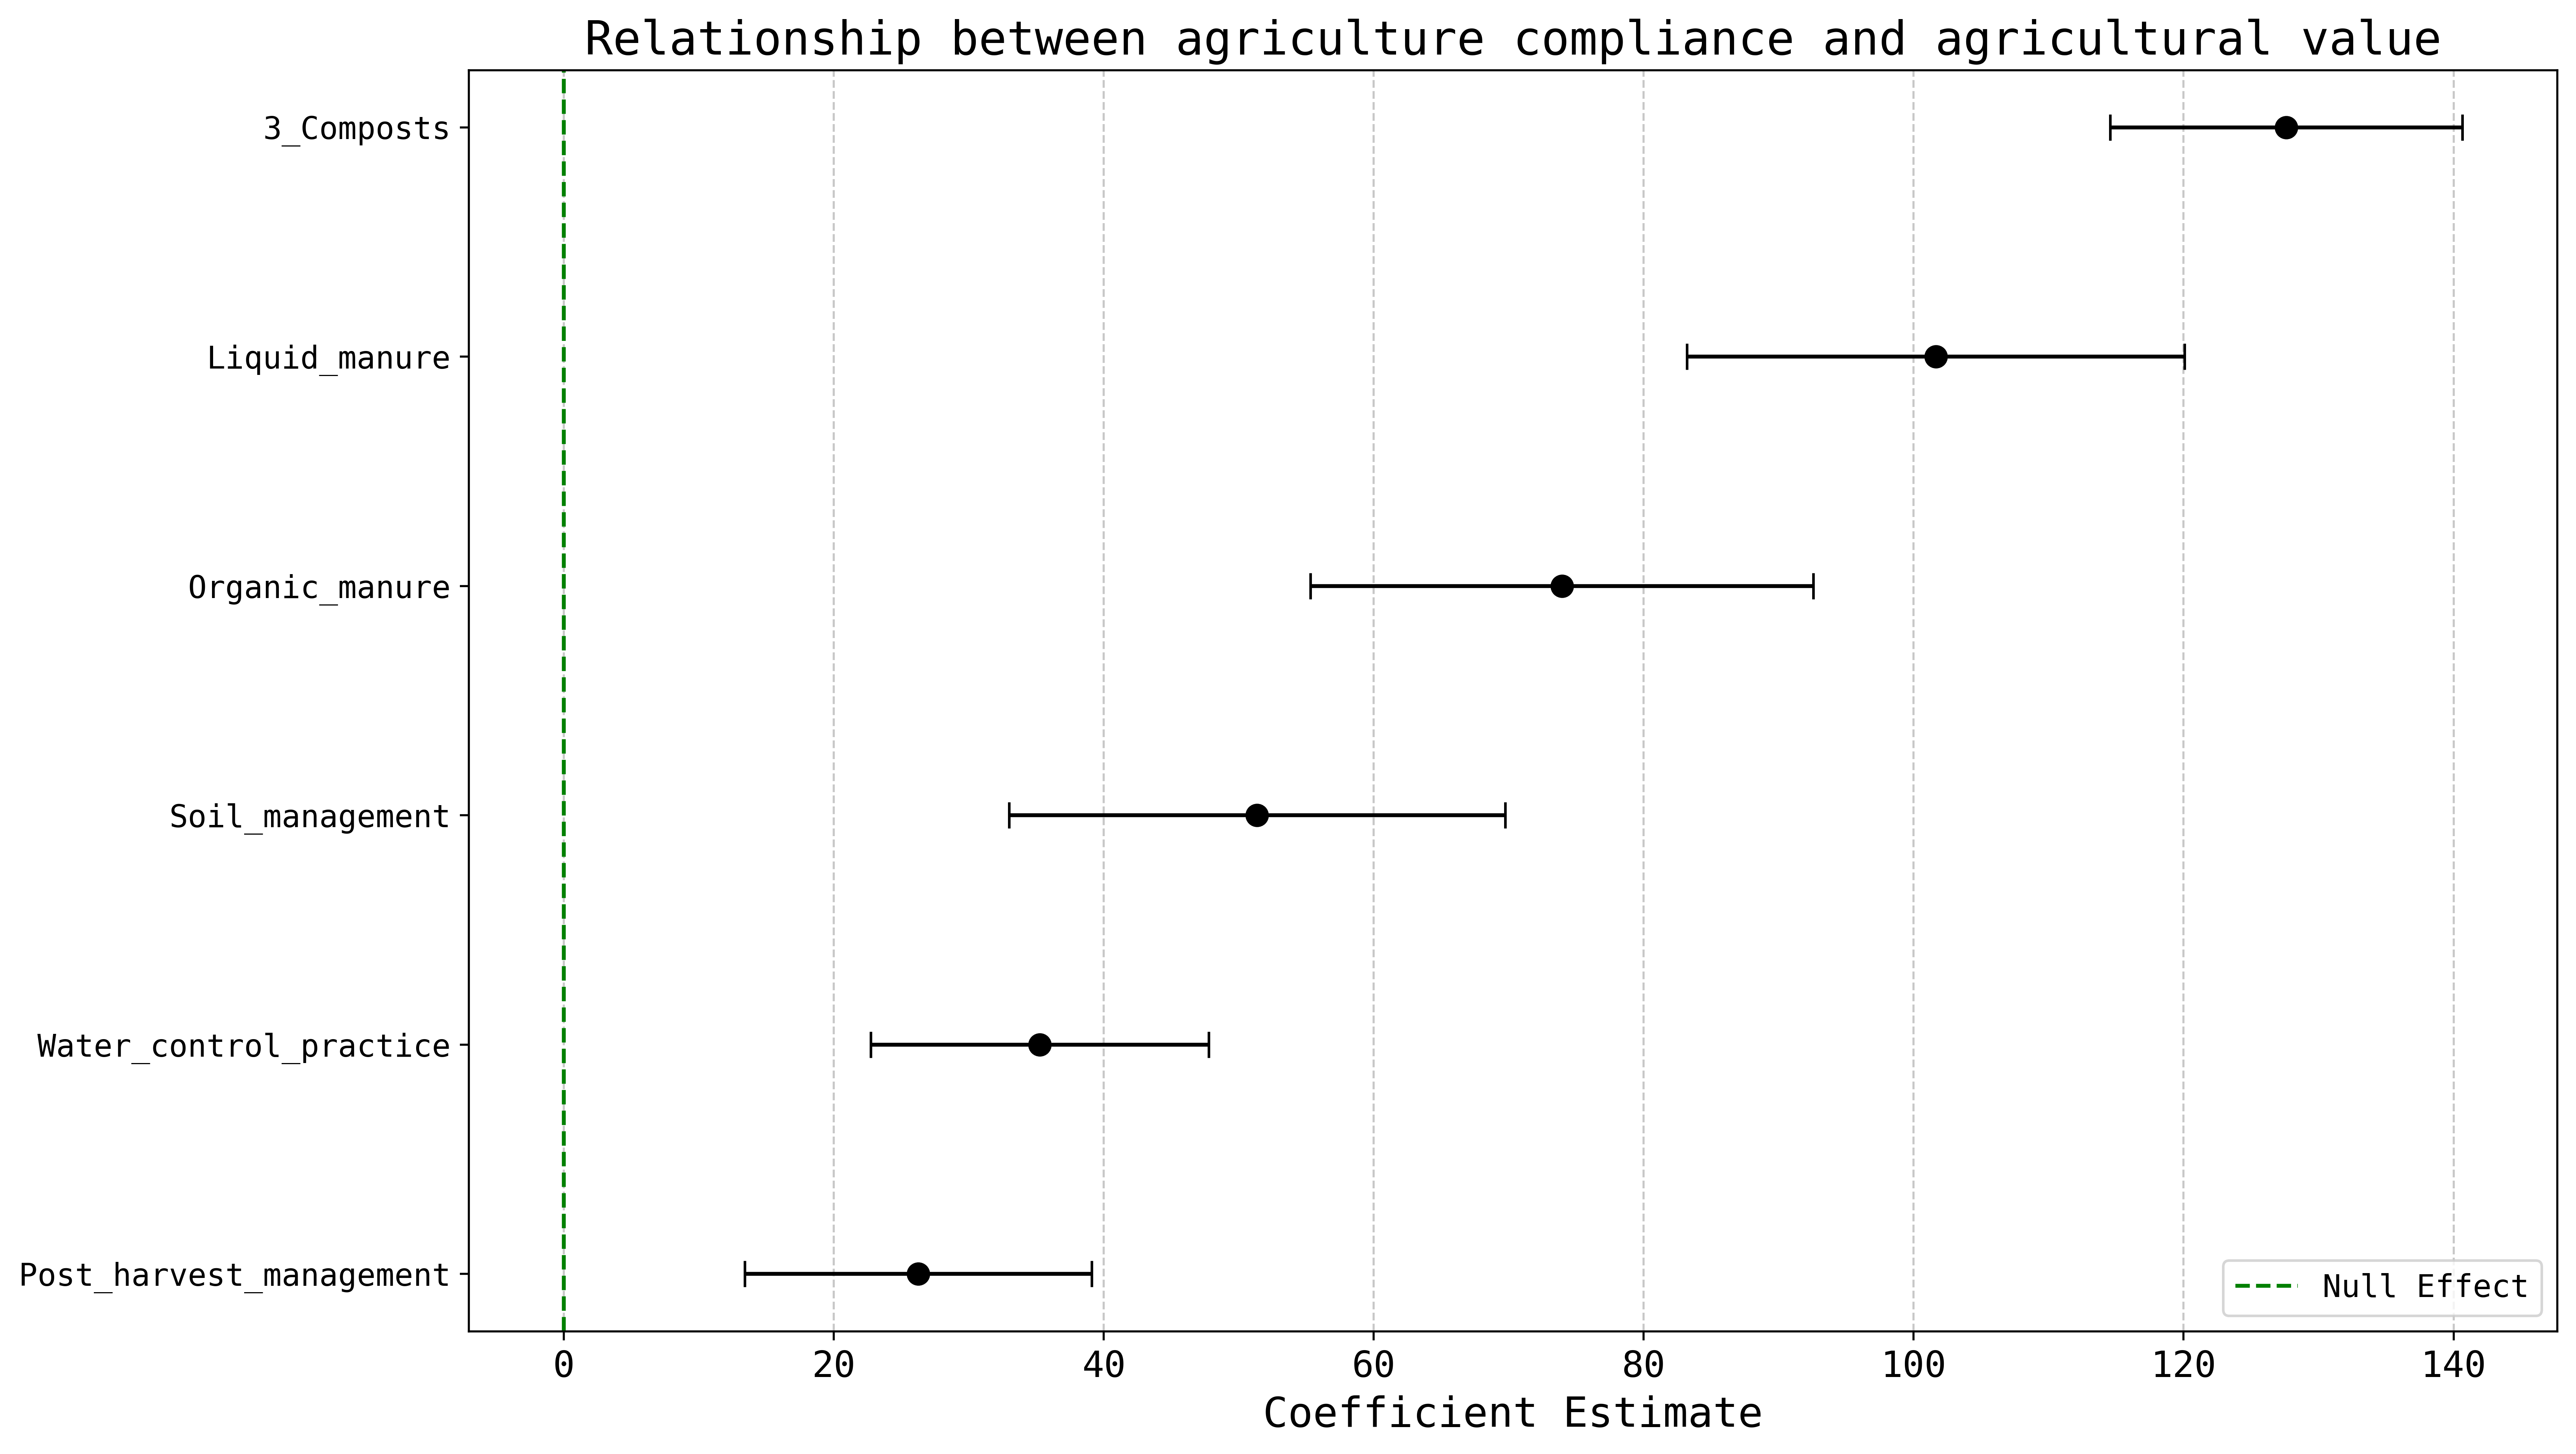

In [332]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

# Set font to Oswald
rcParams['font.family'] = 'monospace'
rcParams['font.size'] = 14  # Increase default font size

# Extract coefficients and confidence intervals
coefficients = results.params
conf_intervals = results.conf_int()
conf_intervals['coef'] = coefficients

# Rename columns for clarity
conf_intervals.columns = ['CI_lower', 'CI_upper', 'coef']

# Sort the DataFrame by the 'coef' column, excluding the constant
conf_intervals_sorted = conf_intervals.iloc[1:].sort_values('coef', ascending=True)

# Prepare the plot with increased DPI
fig, ax = plt.subplots(figsize=(14, 8), dpi=500)  # Increase figure size and DPI

# Calculate error bars for the confidence intervals
lower_errors = conf_intervals_sorted['coef'] - conf_intervals_sorted['CI_lower']
upper_errors = conf_intervals_sorted['CI_upper'] - conf_intervals_sorted['coef']

# Plot coefficients with error bars
ax.errorbar(conf_intervals_sorted['coef'], 
            np.arange(len(conf_intervals_sorted)), 
            xerr=[lower_errors, upper_errors], 
            fmt='o', color='black', capsize=5, markersize=8)

# Add a reference line at x=0 (null effect)
ax.axvline(x=0, color='green', linestyle='--', label='Null Effect')

# Set y-ticks and labels
ax.set_yticks(np.arange(len(conf_intervals_sorted)))
ax.set_yticklabels(conf_intervals_sorted.index, fontsize=12)  # Increase font size for y-tick labels

ax.set_xlabel('Coefficient Estimate', fontsize=16)  # Increase font size for x-label
ax.set_title('Relationship between agriculture compliance and agricultural value', fontsize=18)  # Increase font size for title
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
ax.legend(fontsize=12)  # Increase font size for legend

# Optimize layout and display the plot
plt.tight_layout()
plt.savefig("forest_plot_c_i.png")
plt.show()

Length of coefficients: 7
Length of standard_errors: 7
Length of variables: 6
NaN values in coefficients: 0
NaN values in standard errors: 0


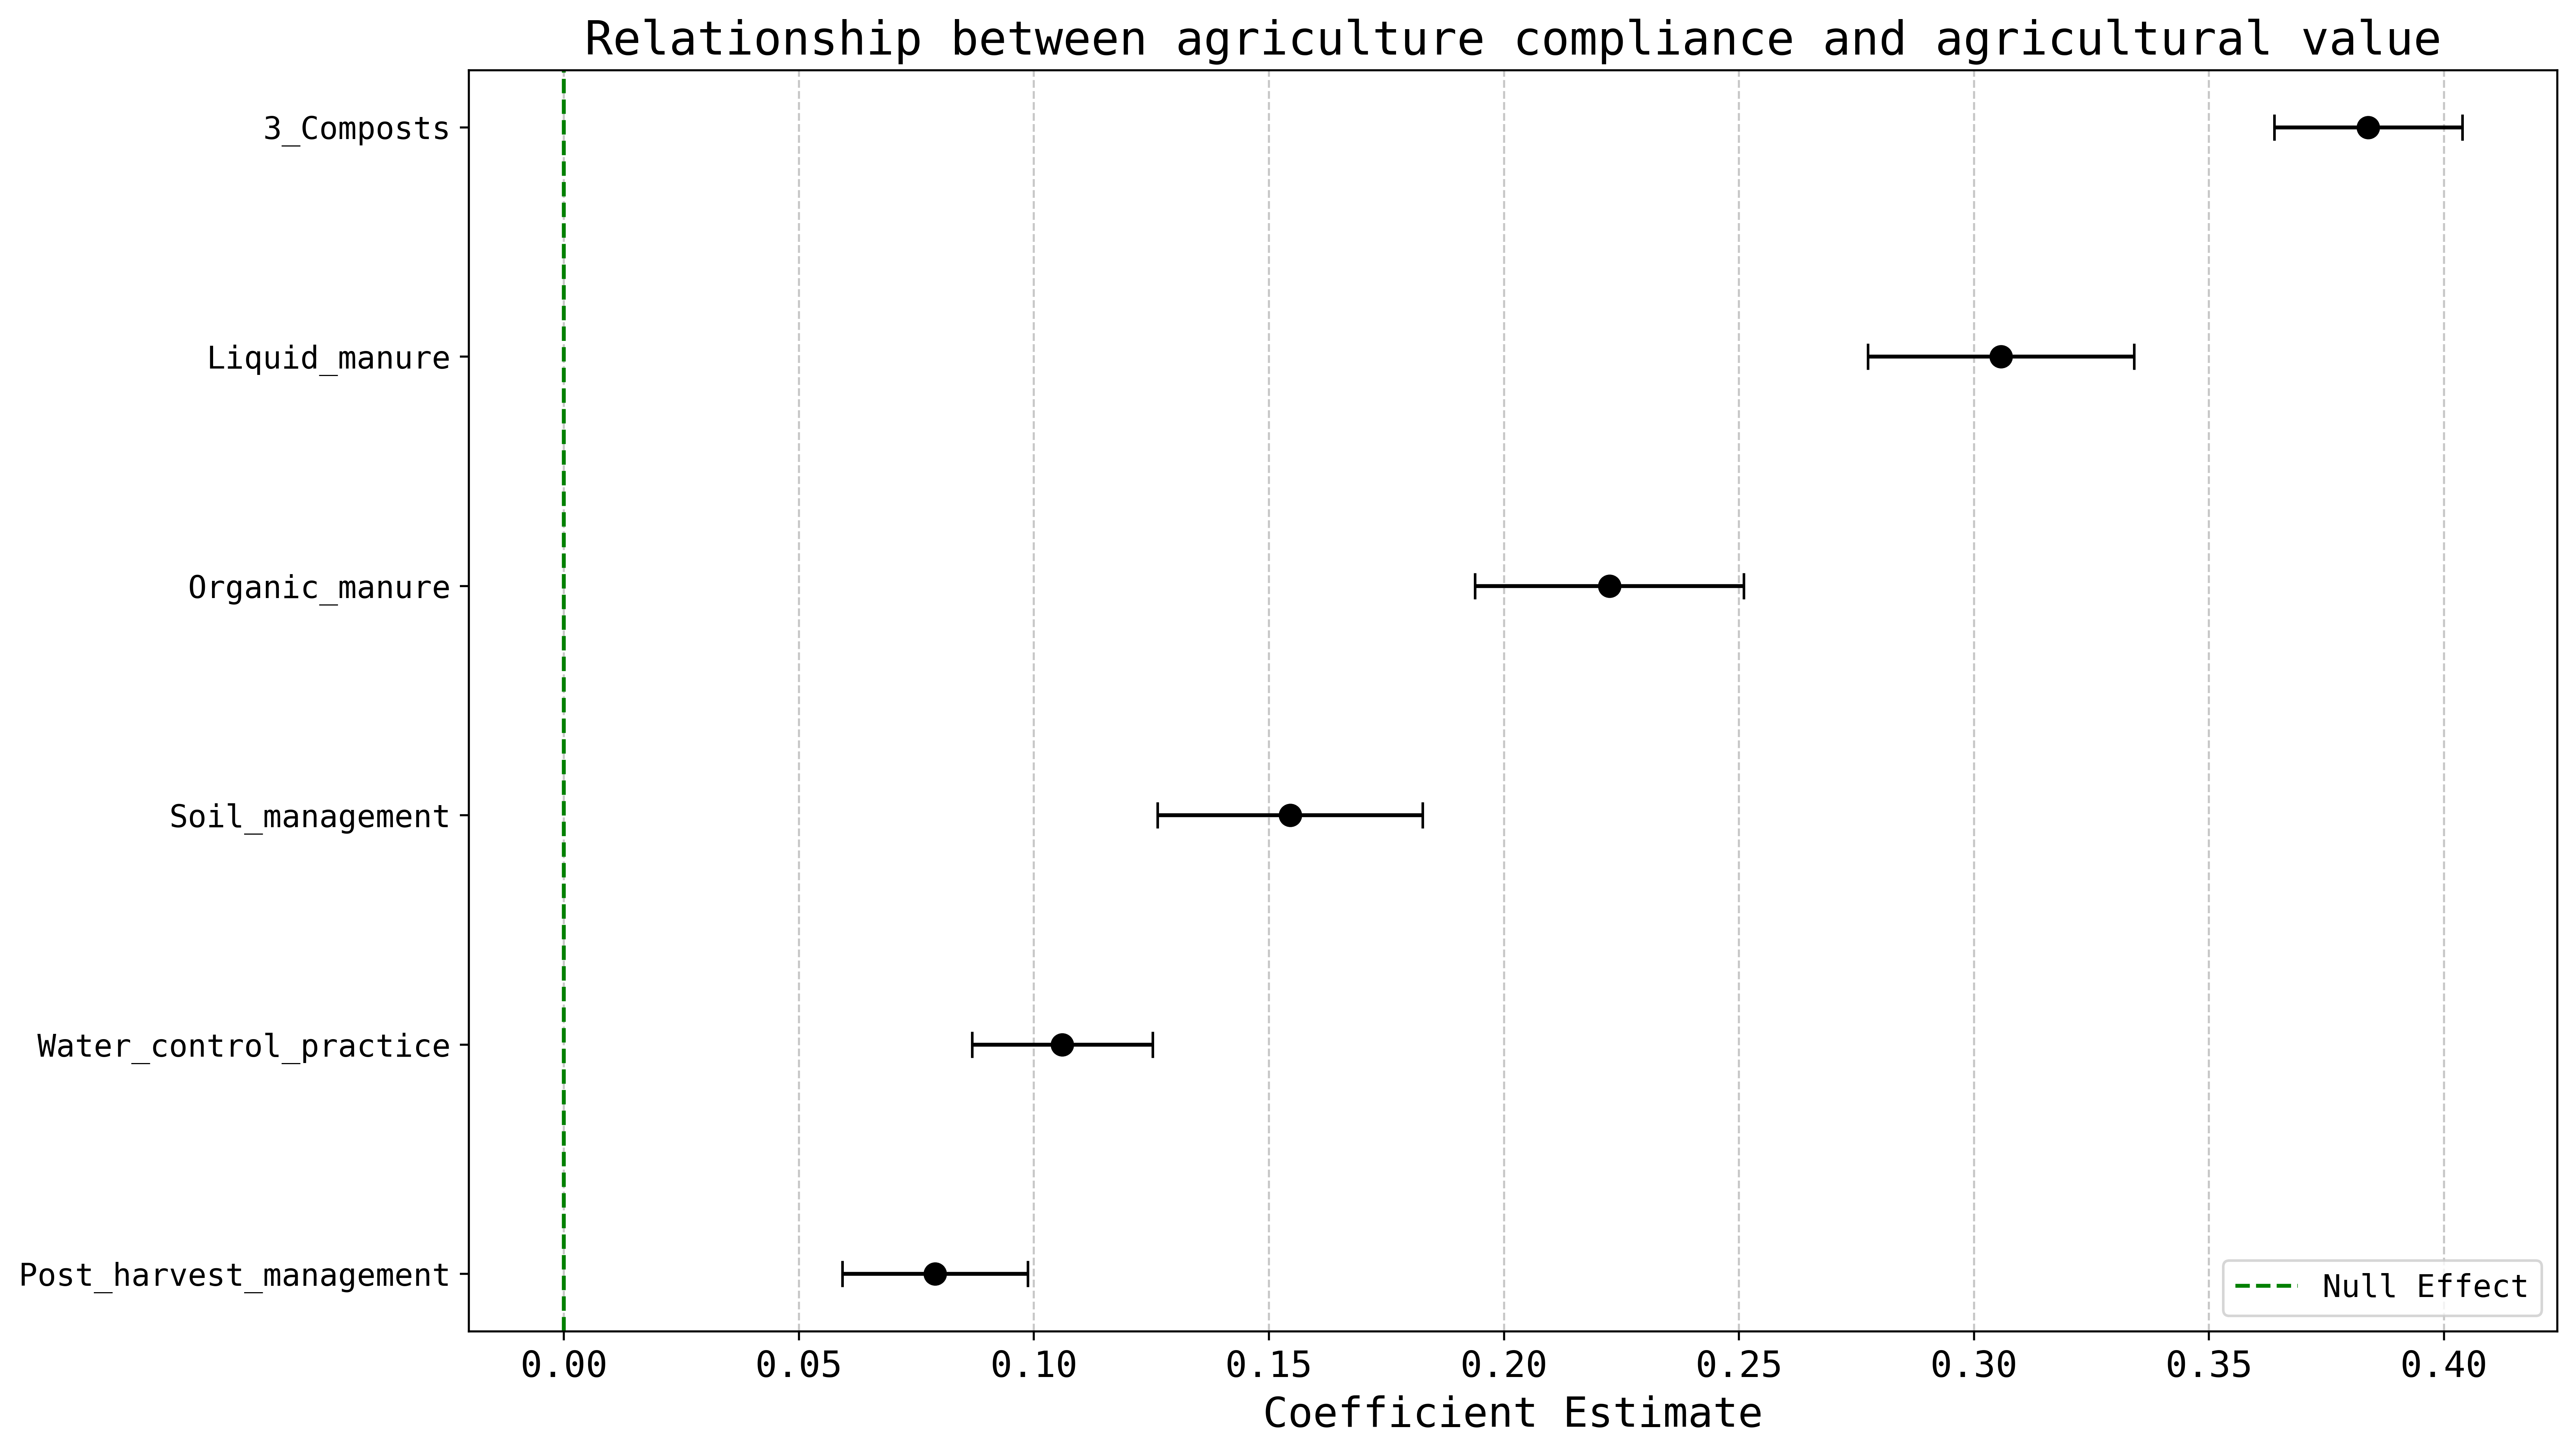

In [329]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set font to Oswald
rcParams['font.family'] = 'monospace'
rcParams['font.size'] = 14  # Increase default font size

# Extract coefficients and standard errors
coefficients = results.params
standard_errors = results.bse  # Standard errors of the coefficients

# Print lengths for debugging
print("Length of coefficients:", len(coefficients))
print("Length of standard_errors:", len(standard_errors))
print("Length of variables:", len(variables))

# Create a DataFrame to hold coefficients and standard errors
# If there is an intercept, skip it when creating the DataFrame
if len(coefficients) > len(variables):
    coef_df = pd.DataFrame({
        'coef': coefficients[1:],  # Skip the intercept
        'se': standard_errors[1:],  # Skip the intercept
        'variable': variables
    })
else:
    coef_df = pd.DataFrame({
        'coef': coefficients,
        'se': standard_errors,
        'variable': variables
    })

# Check for NaN values in coefficients and standard errors
print("NaN values in coefficients:", coef_df['coef'].isna().sum())
print("NaN values in standard errors:", coef_df['se'].isna().sum())

# Drop any rows with NaN values
coef_df = coef_df.dropna()

# Sort the DataFrame by coefficients (descending order for clean display)
coef_df = coef_df.sort_values(by='coef', ascending=True)

# Prepare the plot with increased DPI
fig, ax = plt.subplots(figsize=(14, 8), dpi=500)  # Increase figure size and DPI

# Calculate error bars for the standard errors
lower_errors = coef_df['se']  # Lower error as standard errors
upper_errors = coef_df['se']  # Upper error as standard errors

# Plot coefficients with error bars
ax.errorbar(coef_df['coef'], 
            np.arange(len(coef_df['variable'])), 
            xerr=[lower_errors, upper_errors], 
            fmt='o', color='black', capsize=5, markersize=8)

# Add a reference line at x=0 (null effect)
ax.axvline(x=0, color='green', linestyle='--', label='Null Effect')

# Set y-ticks and labels based on sorted variables
ax.set_yticks(np.arange(len(coef_df['variable'])))
ax.set_yticklabels(coef_df['variable'], fontsize=12)  # Ensure all variables are shown
ax.set_xlabel('Coefficient Estimate', fontsize=16)  # Increase font size for x-label
ax.set_title('Relationship between agriculture compliance and agricultural value', fontsize=18)  # Increase font size for title
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
ax.legend(fontsize=12)  # Increase font size for legend

# Optimize layout and display the plot
plt.tight_layout()
plt.savefig("forest_plot_ses.png")
plt.show()


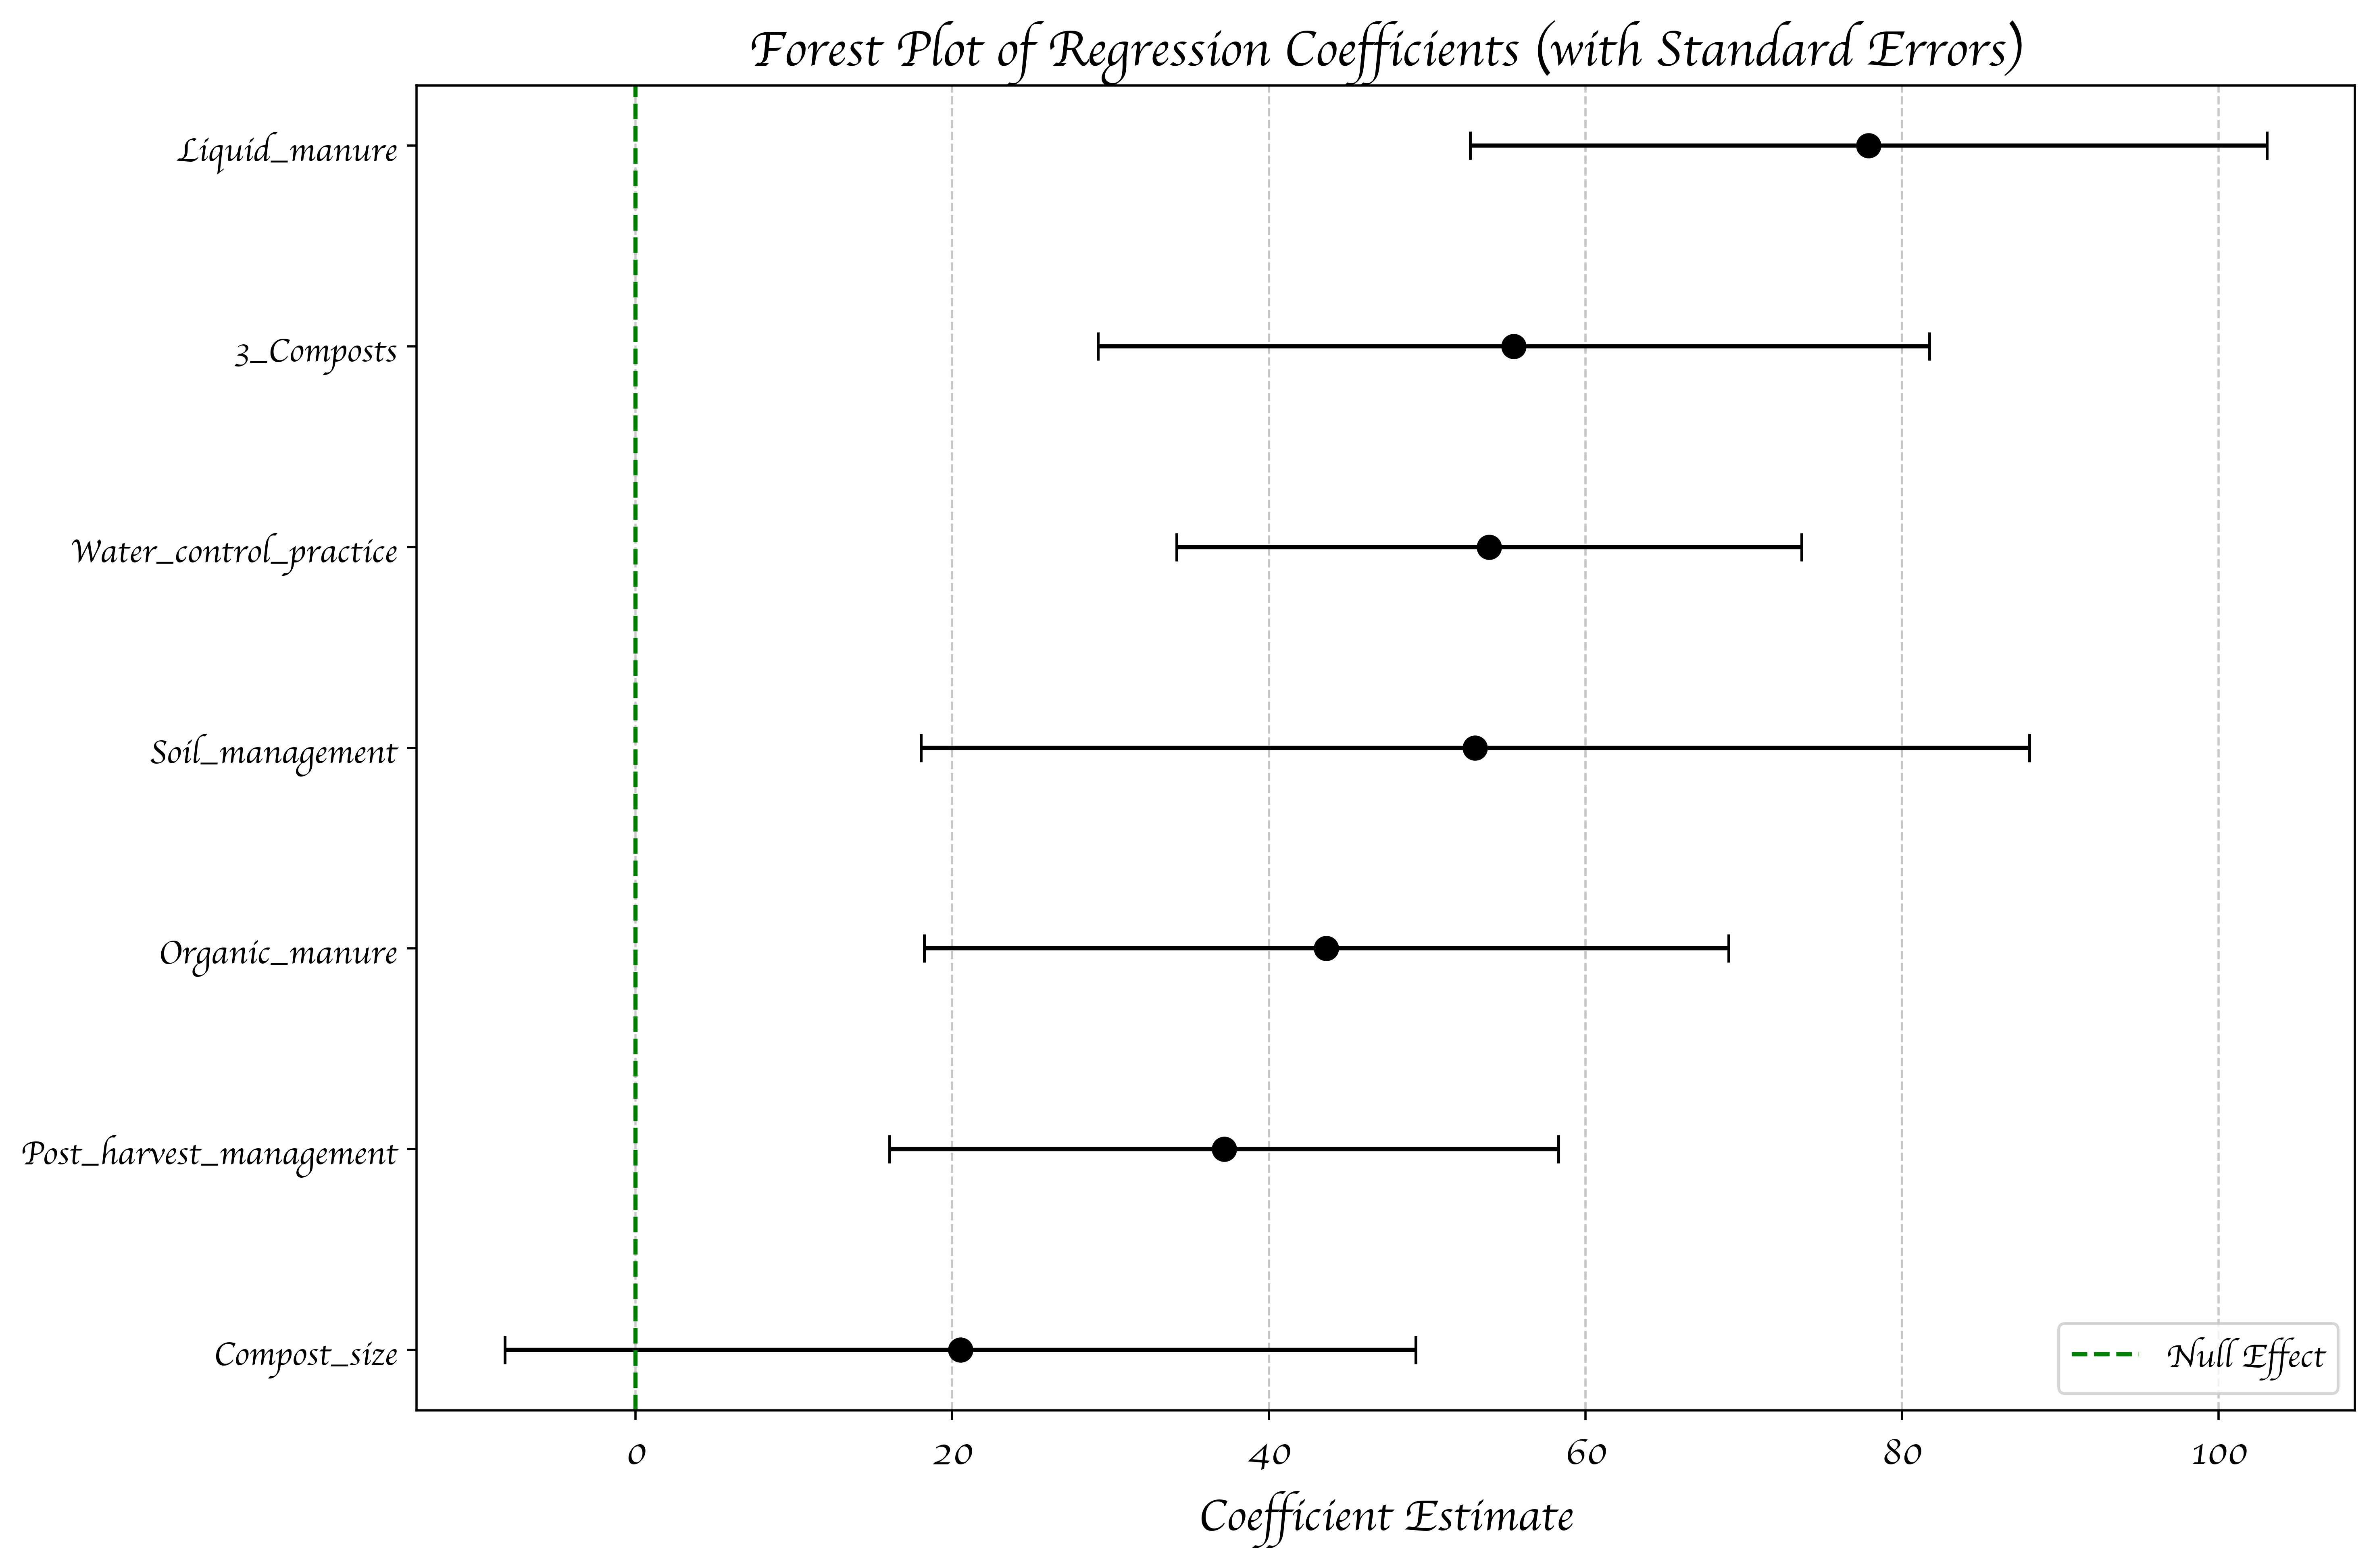

In [74]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

# Set font to cursive
rcParams['font.family'] = 'cursive'
rcParams['font.size'] = 14  # Increase default font size

# Extract coefficients and standard errors
coefficients = results.params
std_errors = results.bse

# Create a DataFrame with coefficients and standard errors
coef_data = pd.DataFrame({
    'coef': coefficients,
    'se': std_errors
})

# Sort the DataFrame by the 'coef' column, excluding the constant
coef_data_sorted = coef_data.iloc[1:].sort_values('coef', ascending=True)

# Prepare the plot with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=500)  # Increase figure size and DPI

# Calculate error bars for the standard errors (typically 1.96 * SE for 95% CI)
errors = 1.96 * coef_data_sorted['se']

# Plot coefficients with error bars
ax.errorbar(coef_data_sorted['coef'], 
            np.arange(len(coef_data_sorted)), 
            xerr=errors, 
            fmt='o', color='black', capsize=5, markersize=8)

# Add a reference line at x=0 (null effect)
ax.axvline(x=0, color='green', linestyle='--', label='Null Effect')

# Set y-ticks and labels
ax.set_yticks(np.arange(len(coef_data_sorted)))
ax.set_yticklabels(coef_data_sorted.index, fontsize=12)  # Increase font size for y-tick labels

ax.set_xlabel('Coefficient Estimate', fontsize=16)  # Increase font size for x-label
ax.set_title('Forest Plot of Regression Coefficients (with Standard Errors)', fontsize=18)  # Increase font size for title
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
ax.legend(fontsize=12)  # Increase font size for legend

# Optimize layout and display the plot
plt.tight_layout()
plt.show()

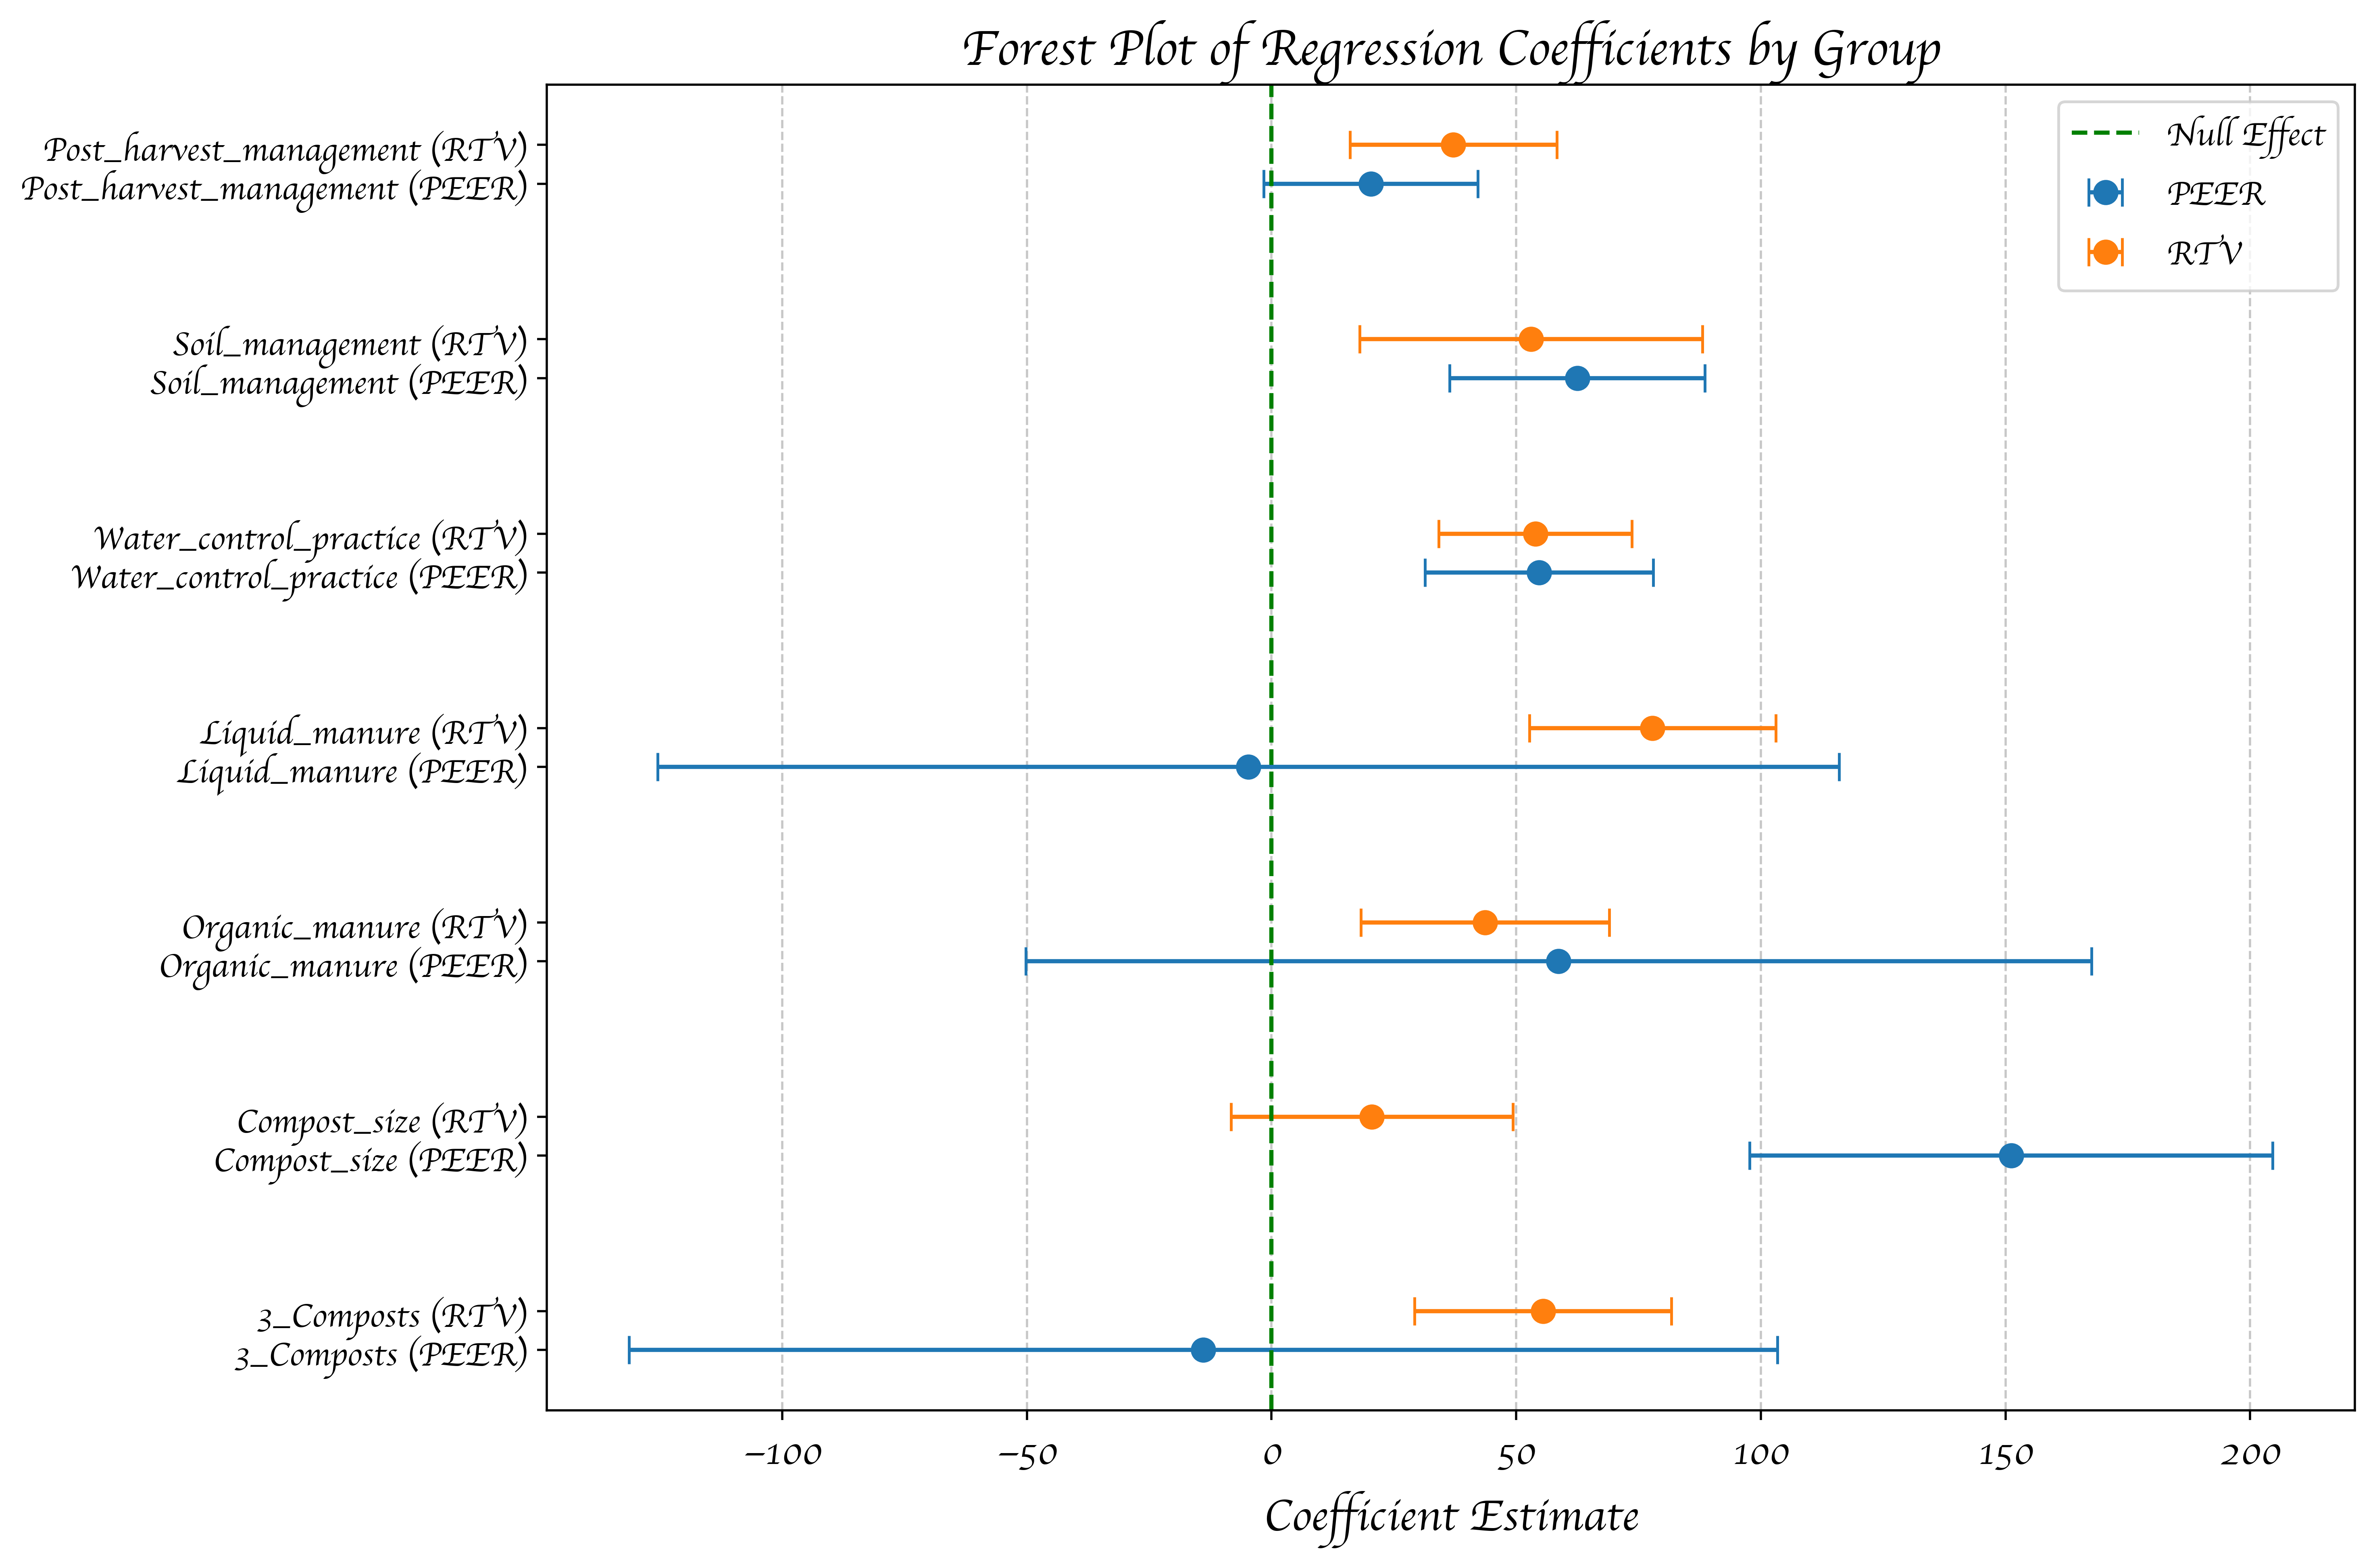

In [24]:
# Set font to Oswald
rcParams['font.family'] = 'cursive'
rcParams['font.size'] = 14  # Increase default font size

# Initialize lists to store coefficients and confidence intervals
all_coefficients = []
all_conf_intervals = []
group_labels = []

# Loop through each group in STATUS
for group in year_2['STATUS'].unique():
    group_data = year_2[year_2['STATUS'] == group]

    # Independent variables
    X = group_data[variables]
    y = group_data['HH Income + Production (USD_Cons_rate)']

    # Add constant to the model (for the intercept)
    X = sm.add_constant(X)

    # Fit the OLS model
    model = sm.OLS(y, X)
    results = model.fit()

    # Extract coefficients and confidence intervals
    coefficients = results.params
    conf_intervals = results.conf_int()
    conf_intervals['coef'] = coefficients

    # Rename columns for clarity
    conf_intervals.columns = ['CI_lower', 'CI_upper', 'coef']

    # Store results
    all_coefficients.append(coefficients)
    all_conf_intervals.append(conf_intervals)
    group_labels.append(group)

# Prepare the plot with increased DPI
fig, ax = plt.subplots(figsize=(12, 8), dpi=500)

# Plot coefficients with error bars for each group
for i, (coefficients, conf_intervals) in enumerate(zip(all_coefficients, all_conf_intervals)):
    lower_errors = conf_intervals['coef'][1:] - conf_intervals['CI_lower'][1:]
    upper_errors = conf_intervals['CI_upper'][1:] - conf_intervals['coef'][1:]

    ax.errorbar(conf_intervals['coef'][1:], 
                np.arange(len(variables)) + i * 0.2,  # Offset for separate groups
                xerr=[lower_errors, upper_errors], 
                fmt='o', label=group_labels[i], capsize=5, markersize=8)

# Add a reference line at x=0 (null effect)
ax.axvline(x=0, color='green', linestyle='--', label='Null Effect')

# Set y-ticks and labels
ax.set_yticks(np.concatenate([np.arange(len(variables)) + i * 0.2 for i in range(len(group_labels))]))
ax.set_yticklabels(np.concatenate([[f"{var} ({group})" for var in variables] for group in group_labels]), fontsize=12)
ax.set_xlabel('Coefficient Estimate', fontsize=16)
ax.set_title('Forest Plot of Regression Coefficients by Group', fontsize=18)
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.legend(fontsize=12)

# Optimize layout and display the plot
plt.tight_layout()
plt.savefig('forest_plot_by_group.png', format='png', dpi=500)
plt.show()

In [29]:
# import numpy as np
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# from matplotlib import rcParams

# # Set font to Oswald
# rcParams['font.family'] = 'cursive'
# rcParams['font.size'] = 14  # Increase default font size

# # Filter data for RTV only
# rtv_data = year_2[year_2['STATUS'] == 'RTV']

# # Initialize lists to store coefficients and confidence intervals
# all_coefficients = []
# all_conf_intervals = []

# # Independent variables
# X = rtv_data[variables]
# y = rtv_data['HH Income + Production (USD_Cons_rate)']

# # Add constant to the model (for the intercept)
# X = sm.add_constant(X)

# # Fit the OLS model
# model = sm.OLS(y, X)
# results = model.fit()

# # Extract coefficients and confidence intervals
# coefficients = results.params
# conf_intervals = results.conf_int()
# conf_intervals['coef'] = coefficients

# # Rename columns for clarity
# conf_intervals.columns = ['CI_lower', 'CI_upper', 'coef']

# # Prepare the plot with increased DPI
# fig, ax = plt.subplots(figsize=(12, 8), dpi=500)

# # Prepare colors based on the binary nature of the variables (1 for blue, 0 for red)
# colors = ['blue' if value == 1 else 'red' for value in np.array(X[variables].iloc[0])]

# # Plot coefficients with error bars
# lower_errors = conf_intervals['coef'][1:] - conf_intervals['CI_lower'][1:]
# upper_errors = conf_intervals['CI_upper'][1:] - conf_intervals['coef'][1:]

# # Loop through each variable and plot with its corresponding color
# for i in range(len(variables)):
#     ax.errorbar(conf_intervals['coef'][i + 1], 
#                 i, 
#                 xerr=[[lower_errors[i]], [upper_errors[i]]], 
#                 fmt='o', capsize=5, markersize=8, color=colors[i])

# # Add a reference line at x=0 (null effect)
# ax.axvline(x=0, color='green', linestyle='--', label='Null Effect')

# # Set y-ticks and labels
# ax.set_yticks(np.arange(len(variables)))
# ax.set_yticklabels(variables, fontsize=12)
# ax.set_xlabel('Coefficient Estimate', fontsize=16)
# ax.set_title('Forest Plot of Regression Coefficients for RTV', fontsize=18)
# ax.grid(axis='x', linestyle='--', alpha=0.7)

# # Create a legend for colors
# handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Compliant (1)'),
#            plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Non-Compliant (0)')]
# ax.legend(handles=handles, fontsize=12)

# # Optimize layout and display the plot
# plt.tight_layout()
# plt.savefig('forest_plot_rtv_with_compliance_colors.png', format='png', dpi=500)
# plt.show()


In [34]:
import pandas as pd

# Example DataFrame creation (replace this with your actual data)
# df = pd.read_csv('your_data.csv')

# Ensure the compliance variables and dependent variable are in the right format
compliance_vars = ['3_Composts', 'Compost_size', 'Organic_manure']
dependent_var = 'HH Income + Production (USD_Cons_rate)'


import statsmodels.api as sm

# Define the independent variables and dependent variable
X = df[compliance_vars]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df[dependent_var]

# Fit the linear regression model
model = sm.OLS(y, X).fit()


In [36]:
results

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,629.407357,5.841793,107.742160,0.000000e+00,617.956665,640.858050
3_Composts,47.071937,13.500230,3.486751,4.904248e-04,20.609686,73.534188
Compost_size,96.682380,13.259850,7.291363,3.232731e-13,70.691306,122.673455
Organic_manure,136.848341,9.040410,15.137405,2.337274e-51,119.127933,154.568750


In [40]:
model.conf_int()

,0,1
const,617.956665,640.858050
3_Composts,20.609686,73.534188
Compost_size,70.691306,122.673455
Organic_manure,119.127933,154.568750


In [35]:
results = model.summary2().tables[1]  # Get the summary table
results['conf_low'], results['conf_high'] = model.conf_int().T  # Confidence intervals

# Keep relevant columns
results = results[['Coef.', 'conf_low', 'conf_high']]
results.reset_index(inplace=True)
results.columns = ['Variable', 'Coefficient', 'CI_Lower', 'CI_Upper']

ValueError: too many values to unpack (expected 2)

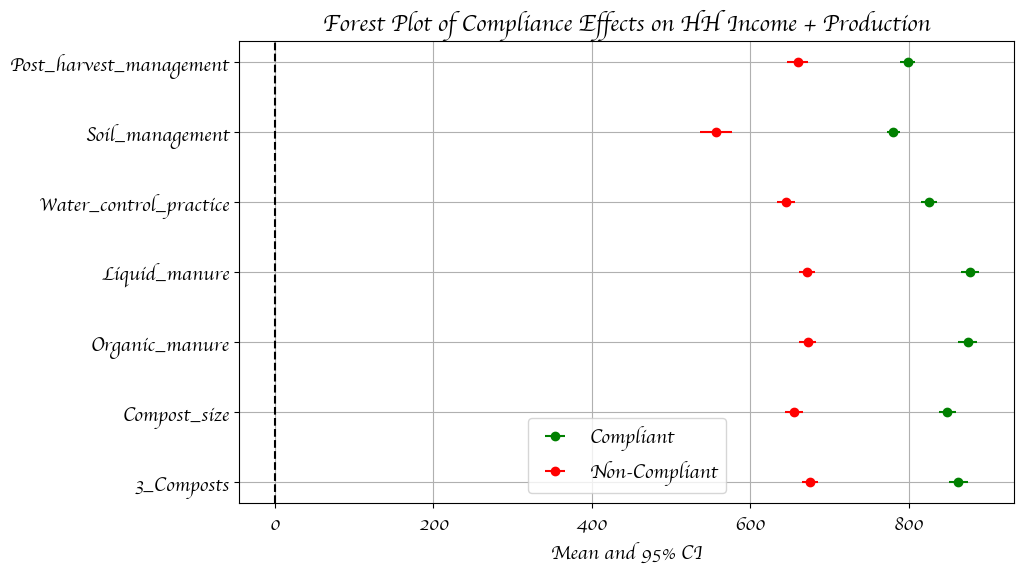

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

compliance_vars = variables
dependent_var = 'HH Income + Production (USD_Cons_rate)'

# Prepare Data for Aggregation
summary_data = []

for var in compliance_vars:
    group_means = df.groupby(var)[dependent_var].agg(['mean', 'count', 'std'])
    group_means['CI_Lower'] = group_means['mean'] - 1.96 * (group_means['std'] / np.sqrt(group_means['count']))
    group_means['CI_Upper'] = group_means['mean'] + 1.96 * (group_means['std'] / np.sqrt(group_means['count']))
    
    summary_data.append({
        'Variable': var,
        'Compliant_Mean': group_means.loc[1, 'mean'],
        'Non_Compliant_Mean': group_means.loc[0, 'mean'],
        'CI_Lower_Compliant': group_means.loc[1, 'CI_Lower'],
        'CI_Upper_Compliant': group_means.loc[1, 'CI_Upper'],
        'CI_Lower_Non_Compliant': group_means.loc[0, 'CI_Lower'],
        'CI_Upper_Non_Compliant': group_means.loc[0, 'CI_Upper'],
    })

summary_df = pd.DataFrame(summary_data)

# Plotting the Forest Plot
plt.figure(figsize=(10, 6))

# Compliant means
plt.errorbar(summary_df['Compliant_Mean'], range(len(summary_df)), 
             xerr=[summary_df['Compliant_Mean'] - summary_df['CI_Lower_Compliant'], 
                   summary_df['CI_Upper_Compliant'] - summary_df['Compliant_Mean']], 
             fmt='o', label='Compliant', color='green')

# Non-compliant means
plt.errorbar(summary_df['Non_Compliant_Mean'], range(len(summary_df)), 
             xerr=[summary_df['Non_Compliant_Mean'] - summary_df['CI_Lower_Non_Compliant'], 
                   summary_df['CI_Upper_Non_Compliant'] - summary_df['Non_Compliant_Mean']], 
             fmt='o', label='Non-Compliant', color='red')

plt.yticks(range(len(summary_df)), summary_df['Variable'])
plt.axvline(0, color='black', linestyle='--')
plt.title('Forest Plot of Compliance Effects on HH Income + Production')
plt.xlabel('Mean and 95% CI')
plt.legend()
plt.grid()
plt.show()

# Climate

In [135]:
agricultural_practices = {
    1: "VSLA access (Adoption of Sustainable Agricultural Practices, Diversification of Livelihoods, etc.)",
    2: "Composting/Proper use of composts",
    3: "Crop diversification",
    4: "Crop rotation",
    5: "Water control practices",
    6: "Soil testing",
    7: "Soil management practices",
    8: "Distribution of early maturing varieties/improved varieties/drought resistant",
    9: "Application of organic manure and pesticides",
    10: "Use of cover crops/Intercropping",
    11: "Use of liquid manure",
    12: "Bottle/irrigation",
    13: "Keyhole/backyard gardening",
    14: "Farmer managed nature regeneration practice",
    15: "Energy saving stoves/bricket making",
    16: "Planting calendars",
    97: "Others, specify"
}


In [120]:
farm_practices = {
    "kap_farm_practices_1": "Mulching",
    "kap_farm_practices_2": "Water Control",
    "kap_farm_practices_3": "Line Planting",
    "kap_farm_practices_4": "Timely Weeding",
    "kap_farm_practices_5": "Manure/Fertilizer Application",
    "kap_farm_practices_6": "Pest and disease control",
    "kap_farm_practices_7": "Intercropping",
    "kap_farm_practices_8": "Crop Rotation",
    "kap_farm_practices_9": "Pruning",
    "kap_farm_practices_10": "Use improved/Quality seed",
    "kap_farm_practices_11": "None"
}

In [112]:
year_2['kap_farm_practices']

0                      7 8
1                    1 2 4
2                      1 4
3                        1
4                       11
               ...        
14009                  1 2
14010    1 2 3 4 5 6 7 8 9
14011                    1
14012                  5 6
14013          1 2 4 6 7 8
Name: kap_farm_practices, Length: 11344, dtype: object

In [123]:
kap_farm_practices = [
    "kap_farm_practices_1",
    "kap_farm_practices_2",
    "kap_farm_practices_3",
    "kap_farm_practices_4",
    "kap_farm_practices_5",
    "kap_farm_practices_6",
    "kap_farm_practices_7",
    "kap_farm_practices_8",
    "kap_farm_practices_9",
    "kap_farm_practices_10",
    "kap_farm_practices_11",
    # "kap_farm_practices_num"
]

In [125]:
(year_2.groupby('STATUS')[kap_farm_practices].mean().T)

STATUS,PEER,RTV
kap_farm_practices_1,0.558805,0.806100
kap_farm_practices_2,0.449686,0.754287
kap_farm_practices_3,0.450314,0.695860
kap_farm_practices_4,0.681761,0.817369
kap_farm_practices_5,0.387421,0.749388
kap_farm_practices_6,0.389937,0.673567
kap_farm_practices_7,0.468239,0.621509
kap_farm_practices_8,0.417296,0.573371
kap_farm_practices_9,0.214151,0.430426
kap_farm_practices_10,0.141195,0.455169


In [138]:
# Map the values in the column to the dictionary
rtv["rtv_support__rank1_mapped"] = rtv["rtv_support__rank1"].map(agricultural_practices)

# Now you can perform the value counts
output = rtv["rtv_support__rank1_mapped"].value_counts(normalize=True)
output

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_16814/616347281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtv["rtv_support__rank1_mapped"] = rtv["rtv_support__rank1"].map(agricultural_practices)


rtv_support__rank1_mapped
VSLA access (Adoption of Sustainable Agricultural Practices, Diversification of Livelihoods, etc.)    0.441268
Distribution of early maturing varieties/improved varieties/drought resistant                         0.162449
Composting/Proper use of composts                                                                     0.144799
Water control practices                                                                               0.054827
Crop diversification                                                                                  0.048266
Soil management practices                                                                             0.033115
Application of organic manure and pesticides                                                          0.030303
Crop rotation                                                                                         0.023899
Use of liquid manure                                                                  

In [140]:
# Map the values in the column to the dictionary
rtv["rtv_support__rank2_mapped"] = rtv["rtv_support__rank2"].map(agricultural_practices)

# Now you can perform the value counts
output = rtv["rtv_support__rank2_mapped"].value_counts(normalize=True)
output

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_16814/847924962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtv["rtv_support__rank2_mapped"] = rtv["rtv_support__rank2"].map(agricultural_practices)


rtv_support__rank2_mapped
Composting/Proper use of composts                                                                     0.212590
Distribution of early maturing varieties/improved varieties/drought resistant                         0.138550
Water control practices                                                                               0.109341
Crop diversification                                                                                  0.094502
Soil management practices                                                                             0.084192
VSLA access (Adoption of Sustainable Agricultural Practices, Diversification of Livelihoods, etc.)    0.081849
Application of organic manure and pesticides                                                          0.078882
Crop rotation                                                                                         0.072946
Use of liquid manure                                                                  

In [141]:
# Map the values in the column to the dictionary
rtv["rtv_support__rank3_mapped"] = rtv["rtv_support__rank3"].map(agricultural_practices)

# Now you can perform the value counts
output = rtv["rtv_support__rank3_mapped"].value_counts(normalize=True)
output

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_16814/3837100708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtv["rtv_support__rank3_mapped"] = rtv["rtv_support__rank3"].map(agricultural_practices)


rtv_support__rank3_mapped
Application of organic manure and pesticides                                                          0.128085
Composting/Proper use of composts                                                                     0.114339
Water control practices                                                                               0.107154
Distribution of early maturing varieties/improved varieties/drought resistant                         0.104967
Use of liquid manure                                                                                  0.099032
Crop diversification                                                                                  0.097938
Soil management practices                                                                             0.088254
Use of cover crops/Intercropping                                                                      0.067948
Crop rotation                                                                         

In [142]:
# Map the values in the column to the dictionary
rtv["rtv_support__rank4_mapped"] = rtv["rtv_support__rank4"].map(agricultural_practices)

# Now you can perform the value counts
output = rtv["rtv_support__rank4_mapped"].value_counts(normalize=True)
output

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_16814/1439738006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtv["rtv_support__rank4_mapped"] = rtv["rtv_support__rank4"].map(agricultural_practices)


rtv_support__rank4_mapped
Application of organic manure and pesticides                                                          0.148547
Use of liquid manure                                                                                  0.110747
Water control practices                                                                               0.096845
Crop rotation                                                                                         0.094814
Use of cover crops/Intercropping                                                                      0.093096
Composting/Proper use of composts                                                                     0.081537
Soil management practices                                                                             0.081225
Distribution of early maturing varieties/improved varieties/drought resistant                         0.065292
Crop diversification                                                                  

## Climate Intervations Effectiveness

In [148]:
effectiveness_scale = {
    1: "Not effective at all",
    2: "Slightly effective",
    3: "Moderately effective",
    4: "Effective",
    5: "Very effective"
}

In [153]:
rtv['rtv_support_climate_change_effectiveness'].map(effectiveness_scale).value_counts(normalize=True)

rtv_support_climate_change_effectiveness
Very effective          0.429763
Effective               0.311135
Moderately effective    0.125910
Slightly effective      0.094964
Not effective at all    0.038228
Name: proportion, dtype: float64

## Weather Updates

In [154]:
## received weather updates
rtv['rtv_support_weather_update'].mean()

0.6804529788281635

In [181]:
## received weather updates
rtv['rtv_support_weather_update'].value_counts(normalize=True)

rtv_support_weather_update
1.0    0.680453
0.0    0.319547
Name: proportion, dtype: float64

In [160]:
rtv[['weather_support_organization_1', 'weather_support_organization_2', 'weather_support_organization_97']].mean()

weather_support_organization_1     0.818017
weather_support_organization_2     0.453871
weather_support_organization_97    0.053184
dtype: float64

In [187]:
rtv.groupby('pre_district')[['weather_support_organization_1', 'weather_support_organization_2', 'weather_support_organization_97']].mean()

,weather_support_organization_1,weather_support_organization_2,weather_support_organization_97
pre_district,,,
Kagadi_GAC,0.932773,0.380252,0.010504
Kagadi_Standard,0.861972,0.354930,0.016901
Kaliro,0.882353,0.269231,0.045249
Kanungu,0.762264,0.586792,0.009434
Kyenjojo,0.882029,0.379272,0.059537
Mitooma,0.814994,0.412334,0.053204
Rubanda,0.881243,0.570477,0.005549
Rubirizi,0.692939,0.461412,0.226601
Rukungiri,0.598753,0.607069,0.035343


In [236]:
rtv['ews_challenges'].value_counts()

ews_challenges
1 2                  908
1 2 3                647
1                    498
1 2 3 4 5 6 7 8 9    358
1 2 3 4              311
                    ... 
1 2 3 4 6 9            1
2 5 6 7 8              1
2 4 6 8                1
3 4 5                  1
2 4 9                  1
Name: count, Length: 295, dtype: int64

In [241]:
# Step 1: Define the mapping dictionary
challenge_mapping = {
    'ews_challenges_1': 'Reduced crop yields',
    'ews_challenges_2': 'Complete crop failure',
    'ews_challenges_3': 'Stunted growth',
    'ews_challenges_4': 'Soil fertility loss',
    'ews_challenges_5': 'Water logging',
    'ews_challenges_6': 'Soil erosion and degradation',
    'ews_challenges_7': 'Late planting and harvesting',
    'ews_challenges_8': 'Increased input costs',
    'ews_challenges_9': 'Livestock losses',
    'ews_challenges_97': 'Others, specify'
}

# Step 2: Group by 'STATUS', calculate mean, and transpose the DataFrame
grouped_data = year_2.groupby('STATUS')[
    [
        'ews_challenges_1', 'ews_challenges_2', 'ews_challenges_3',
        'ews_challenges_4', 'ews_challenges_5', 'ews_challenges_6',
        'ews_challenges_7', 'ews_challenges_8', 'ews_challenges_9',
        'ews_challenges_97'
    ]
].mean().T

# Step 3: Rename the index using the mapping
grouped_data.index = grouped_data.index.map(challenge_mapping)

# Step 4: Display the final output
grouped_data

STATUS,PEER,RTV
Reduced crop yields,0.976735,0.958914
Complete crop failure,0.718535,0.700761
Stunted growth,0.472540,0.493176
Soil fertility loss,0.376812,0.400804
Water logging,0.137300,0.221520
Soil erosion and degradation,0.252098,0.329838
Late planting and harvesting,0.296339,0.369056
Increased input costs,0.189931,0.261457
Livestock losses,0.056445,0.107743
"Others, specify",0.001907,0.000144


In [243]:

crop_loss_conditions = [
    'ews_challenges_1',  # Reduced crop yields
    'ews_challenges_2',  # Complete crop failure
    'ews_challenges_3',  # Stunted growth
    'ews_challenges_4',  # Soil fertility loss
    'ews_challenges_5',  # Water logging
    'ews_challenges_7',  # Late planting and harvesting
    'ews_challenges_8'   # Increased input costs
]

# Step 2: Create a 'crop_loss' flag (1 = crop loss, 0 = no crop loss)
# Assuming the columns have 1s and 0s indicating whether the challenge was reported
year_2['crop_loss'] = year_2[crop_loss_conditions].max(axis=1)

# The .max(axis=1) will return 1 if any of the selected columns have a 1 (indicating crop loss)

# Step 3: Filter the data to get only those with crop losses
crop_loss_data = year_2[year_2['crop_loss'] == 1]

# Step 4: View the filtered data (those with crop losses)
# print(crop_loss_data)

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_16814/2506041452.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2['crop_loss'] = year_2[crop_loss_conditions].max(axis=1)


**What kind of weather advisories have you received in the last 12 months?**

In [162]:
weather_alerts = {
    1: "Rainfall forecasts",
    2: "Temperature forecasts",
    3: "Hailstorms alerts",
    4: "FAW alerts (Fall Army Worm)",
    5: "Pest alerts",
    6: "Flooding alerts",
    7: "Extreme events (Cold, heat waves, heavy downpour)",
    97: "Other, Specify"
}


In [179]:
rtv[
    [
         "weather_advisories_1",
         "weather_advisories_2",
         "weather_advisories_3",
         "weather_advisories_4",
         "weather_advisories_5",
         "weather_advisories_6",
         "weather_advisories_7",
         "weather_advisories_97",
    ]
].mean()

weather_advisories_1     0.951700
weather_advisories_2     0.576158
weather_advisories_3     0.234081
weather_advisories_4     0.108900
weather_advisories_5     0.331766
weather_advisories_6     0.188676
weather_advisories_7     0.203509
weather_advisories_97    0.000181
dtype: float64

In [196]:
rtv.groupby('weather_support_organization_1')[
    [
         "weather_advisories_1",
         "weather_advisories_2",
         "weather_advisories_3",
         "weather_advisories_4",
         "weather_advisories_5",
         "weather_advisories_6",
         "weather_advisories_7",
         "weather_advisories_97",
    ]
].mean().T

weather_support_organization_1,0.0,1.0
weather_advisories_1,0.968191,0.948032
weather_advisories_2,0.560636,0.579611
weather_advisories_3,0.148111,0.253207
weather_advisories_4,0.021869,0.128262
weather_advisories_5,0.153082,0.371517
weather_advisories_6,0.121272,0.203671
weather_advisories_7,0.146123,0.216276
weather_advisories_97,0.000000,0.000221


In [197]:
rtv.groupby('weather_support_organization_2')[
    [
         "weather_advisories_1",
         "weather_advisories_2",
         "weather_advisories_3",
         "weather_advisories_4",
         "weather_advisories_5",
         "weather_advisories_6",
         "weather_advisories_7",
         "weather_advisories_97",
    ]
].mean().T

weather_support_organization_2,0.0,1.0
weather_advisories_1,0.940378,0.965325
weather_advisories_2,0.510434,0.655241
weather_advisories_3,0.215634,0.256277
weather_advisories_4,0.124545,0.090076
weather_advisories_5,0.314342,0.352730
weather_advisories_6,0.148062,0.237545
weather_advisories_7,0.168268,0.245915
weather_advisories_97,0.000331,0.000000


In [198]:
rtv.groupby('weather_support_organization_97')[
    [
         "weather_advisories_1",
         "weather_advisories_2",
         "weather_advisories_3",
         "weather_advisories_4",
         "weather_advisories_5",
         "weather_advisories_6",
         "weather_advisories_7",
         "weather_advisories_97",
    ]
].mean().T

weather_support_organization_97,0.0,1.0
weather_advisories_1,0.949561,0.989796
weather_advisories_2,0.567062,0.738095
weather_advisories_3,0.229079,0.323129
weather_advisories_4,0.113680,0.023810
weather_advisories_5,0.341613,0.156463
weather_advisories_6,0.191250,0.142857
weather_advisories_7,0.199847,0.268707
weather_advisories_97,0.000191,0.000000


In [203]:
rtv.groupby('weather_advisories_1')[
    [
         "weather_support_organization_1",
    ]
].value_counts(normalize=True)

weather_advisories_1  weather_support_organization_1
0.0                   1.0                               0.880150
                      0.0                               0.119850
1.0                   1.0                               0.814864
                      0.0                               0.185136
Name: proportion, dtype: float64

In [211]:
rtv.groupby('weather_advisories_1')[
    [
        "weather_support_organization_1",
        "weather_support_organization_2",
        "weather_support_organization_97",
    ]
].mean().T

weather_advisories_1,0.0,1.0
weather_support_organization_1,0.880150,0.814864
weather_support_organization_2,0.325843,0.460369
weather_support_organization_97,0.011236,0.055313


In [212]:
rtv.groupby('weather_advisories_2')[
    [
        "weather_support_organization_1",
        "weather_support_organization_2",
        "weather_support_organization_97",
    ]
].mean().T

weather_advisories_2,0.0,1.0
weather_support_organization_1,0.811353,0.822920
weather_support_organization_2,0.369185,0.516170
weather_support_organization_97,0.032864,0.068132


In [213]:
rtv.groupby('weather_advisories_3')[
    [
        "weather_support_organization_1",
        "weather_support_organization_2",
        "weather_support_organization_97",
    ]
].mean().T

weather_advisories_3,0.0,1.0
weather_support_organization_1,0.797591,0.884853
weather_support_organization_2,0.440718,0.496909
weather_support_organization_97,0.047000,0.073416


In [214]:
rtv.groupby('weather_advisories_4')[
    [
        "weather_support_organization_1",
        "weather_support_organization_2",
        "weather_support_organization_97",
    ]
].mean().T

weather_advisories_4,0.0,1.0
weather_support_organization_1,0.800244,0.963455
weather_support_organization_2,0.463459,0.375415
weather_support_organization_97,0.058262,0.011628


In [215]:
rtv.groupby('weather_advisories_5')[
    [
        "weather_support_organization_1",
        "weather_support_organization_2",
        "weather_support_organization_97",
    ]
].mean().T

weather_advisories_5,0.0,1.0
weather_support_organization_1,0.769356,0.916031
weather_support_organization_2,0.439632,0.482552
weather_support_organization_97,0.067136,0.025082


In [216]:
rtv.groupby('weather_advisories_6')[
    [
        "weather_support_organization_1",
        "weather_support_organization_2",
        "weather_support_organization_97",
    ]
].mean().T

weather_advisories_6,0.0,1.0
weather_support_organization_1,0.802899,0.883030
weather_support_organization_2,0.426533,0.571429
weather_support_organization_97,0.056187,0.040268


In [217]:
rtv.groupby('weather_advisories_7')[
    [
        "weather_support_organization_1",
        "weather_support_organization_2",
        "weather_support_organization_97",
    ]
].mean().T

weather_advisories_7,0.0,1.0
weather_support_organization_1,0.804906,0.869333
weather_support_organization_2,0.429707,0.548444
weather_support_organization_97,0.048830,0.070222


In [218]:
rtv.groupby('weather_advisories_97')[
    [
        "weather_support_organization_1",
        "weather_support_organization_2",
        "weather_support_organization_97",
    ]
].mean().T

weather_advisories_97,0.0,1.0
weather_support_organization_1,0.817984,1.0
weather_support_organization_2,0.453953,0.0
weather_support_organization_97,0.053193,0.0


In [220]:
rtv['pre_district'].value_counts()

pre_district
Mitooma            1257
Rubanda            1254
Rubirizi           1089
Kyenjojo           1005
Kanungu             972
Kaliro              857
Rukungiri           659
Kagadi_GAC          601
Kagadi_Standard     470
Name: count, dtype: int64

In [263]:
rtv["received_intervetion"] = rtv['pre_district'].apply(lambda x: 1 if x in ["Kyenjojo", "Mitooma", "Kaliro"] else 0)

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_16814/4084182067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtv["received_intervetion"] = rtv['pre_district'].apply(lambda x: 1 if x in ["Kyenjojo", "Mitooma", "Kaliro"] else 0)


In [265]:
# rtv.groupby("received_intervetion")[""].mean()

## received intervetion and crop losses

In [269]:
rtv['general_crop_loss'].max()

30000.0

In [275]:
rtv.groupby("received_intervetion")["general_crop_loss"].value_counts(normalize=True)

received_intervetion  general_crop_loss
0                     1.0                  0.695232
                      0.0                  0.304365
                      30000.0              0.000402
1                     1.0                  0.773178
                      0.0                  0.226822
Name: proportion, dtype: float64

In [274]:
rtv.groupby("received_intervetion")["general_crop_loss_season_1"].value_counts(normalize=True)

received_intervetion  general_crop_loss_season_1
0                     1.0                           0.594794
                      0.0                           0.405206
1                     1.0                           0.713077
                      0.0                           0.286923
Name: proportion, dtype: float64

In [273]:
rtv.groupby("received_intervetion")["general_crop_loss_season_2"].value_counts(normalize=True)

received_intervetion  general_crop_loss_season_2
0                     0.0                           0.559151
                      1.0                           0.440420
                      30000.0                       0.000429
1                     1.0                           0.545659
                      0.0                           0.454341
Name: proportion, dtype: float64

In [277]:
rtv.groupby("received_rtv_advisory")["general_crop_loss"].value_counts(normalize=True)

received_rtv_advisory  general_crop_loss
0                      1.0                  0.699345
                       0.0                  0.300085
                       30000.0              0.000570
1                      1.0                  0.743900
                       0.0                  0.256100
Name: proportion, dtype: float64

In [278]:
rtv.groupby("received_rtv_advisory")["general_crop_loss_season_1"].value_counts(normalize=True)

received_rtv_advisory  general_crop_loss_season_1
0                      1.0                           0.612281
                       0.0                           0.387719
1                      1.0                           0.658985
                       0.0                           0.341015
Name: proportion, dtype: float64

In [279]:
rtv.groupby("received_rtv_advisory")["general_crop_loss_season_2"].value_counts(normalize=True)

received_rtv_advisory  general_crop_loss_season_2
0                      0.0                           0.535570
                       1.0                           0.463809
                       30000.0                       0.000621
1                      0.0                           0.509590
                       1.0                           0.490410
Name: proportion, dtype: float64

In [276]:
rtv["received_rtv_advisory"] = rtv["weather_support_organization_1"].apply(lambda x: 1 if x>0 else 0)

/var/folders/xd/0btgr76j2zxc4__ynw0yhwbm0000gn/T/ipykernel_16814/1091626467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtv["received_rtv_advisory"] = rtv["weather_support_organization_1"].apply(lambda x: 1 if x>0 else 0)


In [232]:
rtv['weather_support_organization_1'].value_counts()

weather_support_organization_1
1.0    4522
0.0    1006
Name: count, dtype: int64

In [234]:
rtv.groupby("received_rtv_advisory")["Agriculture Value (USD_Cons_rate)"].mean()

received_rtv_advisory
0    565.437418
1    606.577619
Name: Agriculture Value (USD_Cons_rate), dtype: float64

**In which format or media did this weather information reach you in the last 12 months?**

In [188]:
rtv[
    [
        "weather_information_1",
        "weather_information_2",
        "weather_information_3",
        "weather_information_4",
        "weather_information_5",
        "weather_information_6",
        "weather_information_7",
    ]
].mean()

weather_information_1    0.787627
weather_information_2    0.378075
weather_information_3    0.573082
weather_information_4    0.055355
weather_information_5    0.031295
weather_information_6    0.107453
weather_information_7    0.317113
dtype: float64

**How effective was the weather information in planning for your garden or planting in the last 12 months?**

In [178]:
rtv['weather_information_effectiveness'].map(effectiveness_scale).value_counts(normalize=True)

weather_information_effectiveness
Very effective          0.389653
Effective               0.321997
Moderately effective    0.154667
Slightly effective      0.101845
Not effective at all    0.031838
Name: proportion, dtype: float64